# Electronic fraud payment detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/electronic_payment.csv')

# Exploratory Data Analysis

In [5]:
df.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0

In [6]:
df.tail()

step     type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
59300     9  CASH_IN   65860.73  C1195479057     22200000.0      22300000.0   
59301     9  CASH_IN   79056.73   C413780397     22300000.0      22400000.0   
59302     9  CASH_IN   61395.61  C1012845768     22400000.0      22400000.0   
59303     9  CASH_IN  127486.85  C1876536623     22400000.0      22500000.0   
59304     9  CASH_IN  199887.90   C609450461     22500000.0      22700000.0   

          nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
59300   C766671686      3281685.21      4513619.47      0.0             0.0  
59301    C27489818        84281.97         5225.24      0.0             0.0  
59302   C592593207       640791.86      1848375.70      0.0             0.0  
59303   C471719646       261529.11       197891.83      0.0             0.0  
59304  C2024103961       379883.72         7500.00      NaN             NaN

In [7]:
df.shape

(59305, 11)

In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           1
isFlaggedFraud    1
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df.nunique()

step                  9
type                  5
amount            59042
nameOrig          59304
oldbalanceOrg     35158
newbalanceOrig    28007
nameDest          33343
oldbalanceDest    29603
newbalanceDest    11659
isFraud               2
isFlaggedFraud        1
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59304 entries, 0 to 59303
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            59304 non-null  int64  
 1   type            59304 non-null  object 
 2   amount          59304 non-null  float64
 3   nameOrig        59304 non-null  object 
 4   oldbalanceOrg   59304 non-null  float64
 5   newbalanceOrig  59304 non-null  float64
 6   nameDest        59304 non-null  object 
 7   oldbalanceDest  59304 non-null  float64
 8   newbalanceDest  59304 non-null  float64
 9   isFraud         59304 non-null  float64
 10  isFlaggedFraud  59304 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 5.4+ MB


In [14]:
df.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  59304.000000  5.930400e+04   5.930400e+04    5.930400e+04   
mean       7.696378  1.609298e+05   7.544934e+05    7.687625e+05   
std        1.970376  3.288101e+05   2.278652e+06    2.316429e+06   
min        1.000000  6.300000e-01   0.000000e+00    0.000000e+00   
25%        8.000000  8.361485e+03   0.000000e+00    0.000000e+00   
50%        8.000000  3.838633e+04   1.789490e+04    0.000000e+00   
75%        9.000000  1.939617e+05   1.441322e+05    1.579755e+05   
max        9.000000  1.000000e+07   2.850000e+07    2.860000e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    5.930400e+04    5.930400e+04  59304.000000         59304.0  
mean     8.437881e+05    1.179337e+06      0.001754             0.0  
std      2.406834e+06    2.898272e+06      0.041841             0.0  
min      0.000000e+00    0.000000e+00      0.000000             0.0  
25%      0.000000e+00    0.000000e+00      0.000000             0.0  
50%      8.166435e+03    6.884550e+03      0.000000             0.0  
75%      4.858439e+05    9.224822e+05      0.000000             0.0  
max      3.020000e+07    3.200000e+07      1.000000             0.0

In [15]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['type', 'nameOrig', 'nameDest'], dtype='object')

Numerical type columns:
Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')


In [16]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [17]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [18]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['type']
Non-Categorical Features: ['nameOrig', 'nameDest']
Discrete Features: ['step', 'isFraud', 'isFlaggedFraud']
Continuous Features: ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']


## Visualizations

In [19]:
for i in discrete:
    print(i)
    print(df[i].unique())
    print()

step
[1 2 3 4 5 6 7 8 9]

isFraud
[0. 1.]

isFlaggedFraud
[0.]



In [20]:
for i in discrete:
    print(df[i].value_counts())
    print()

step
9    24206
8    21097
7     6837
1     2708
6     1660
2     1014
5      665
4      565
3      552
Name: count, dtype: int64

isFraud
0.0    59200
1.0      104
Name: count, dtype: int64

isFlaggedFraud
0.0    59304
Name: count, dtype: int64



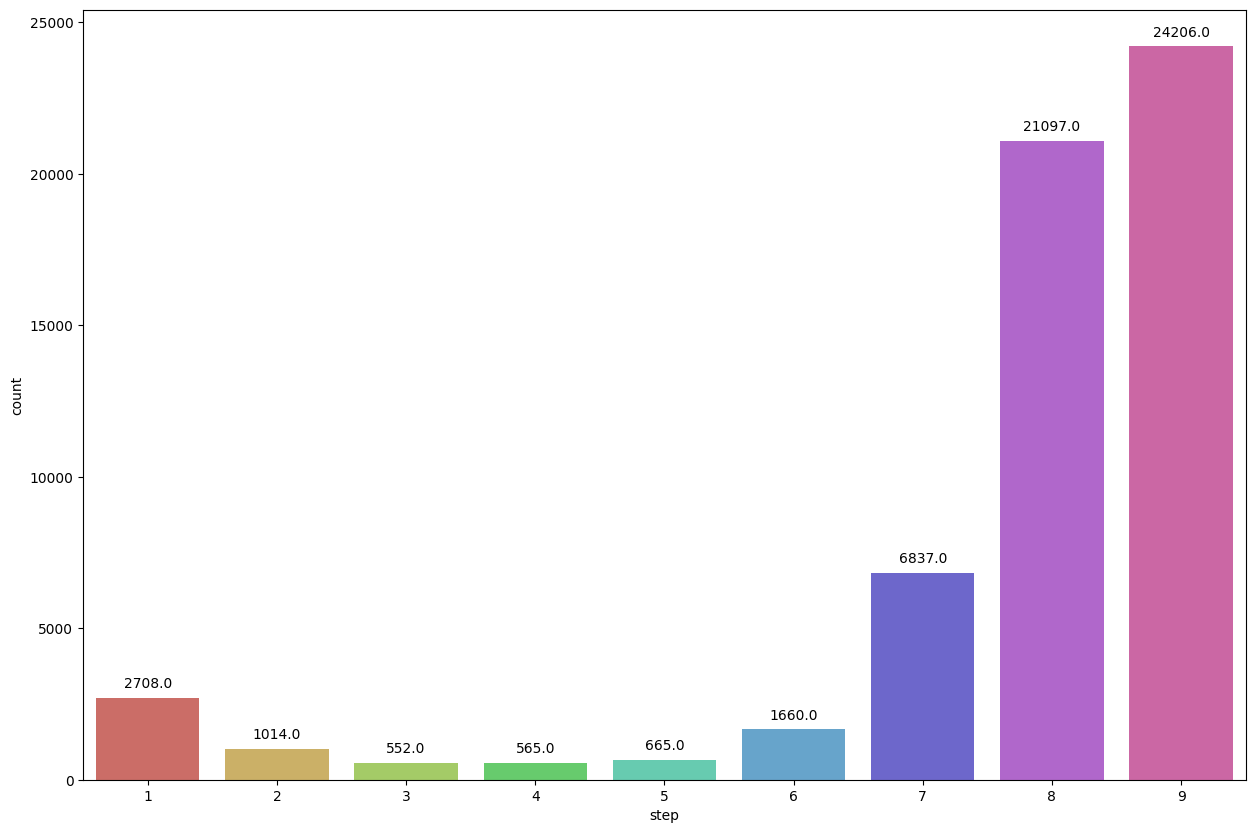

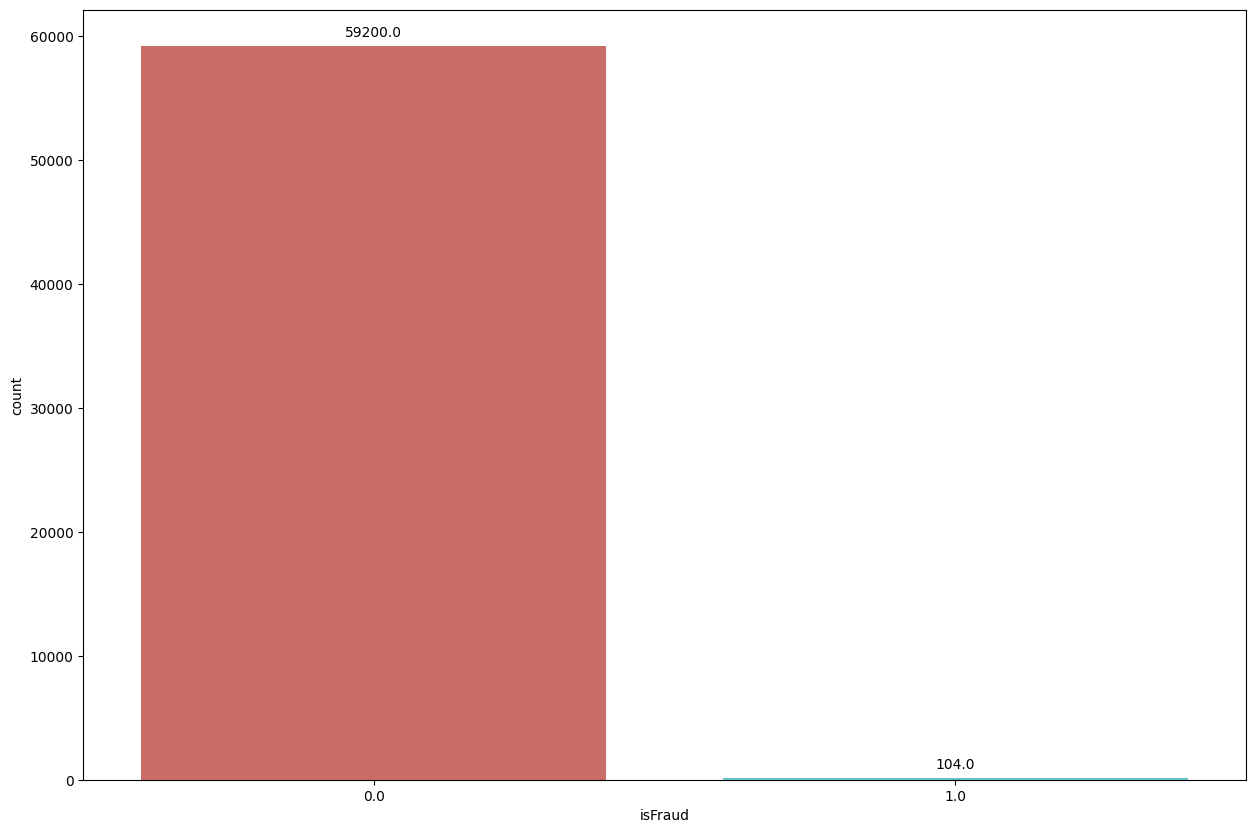

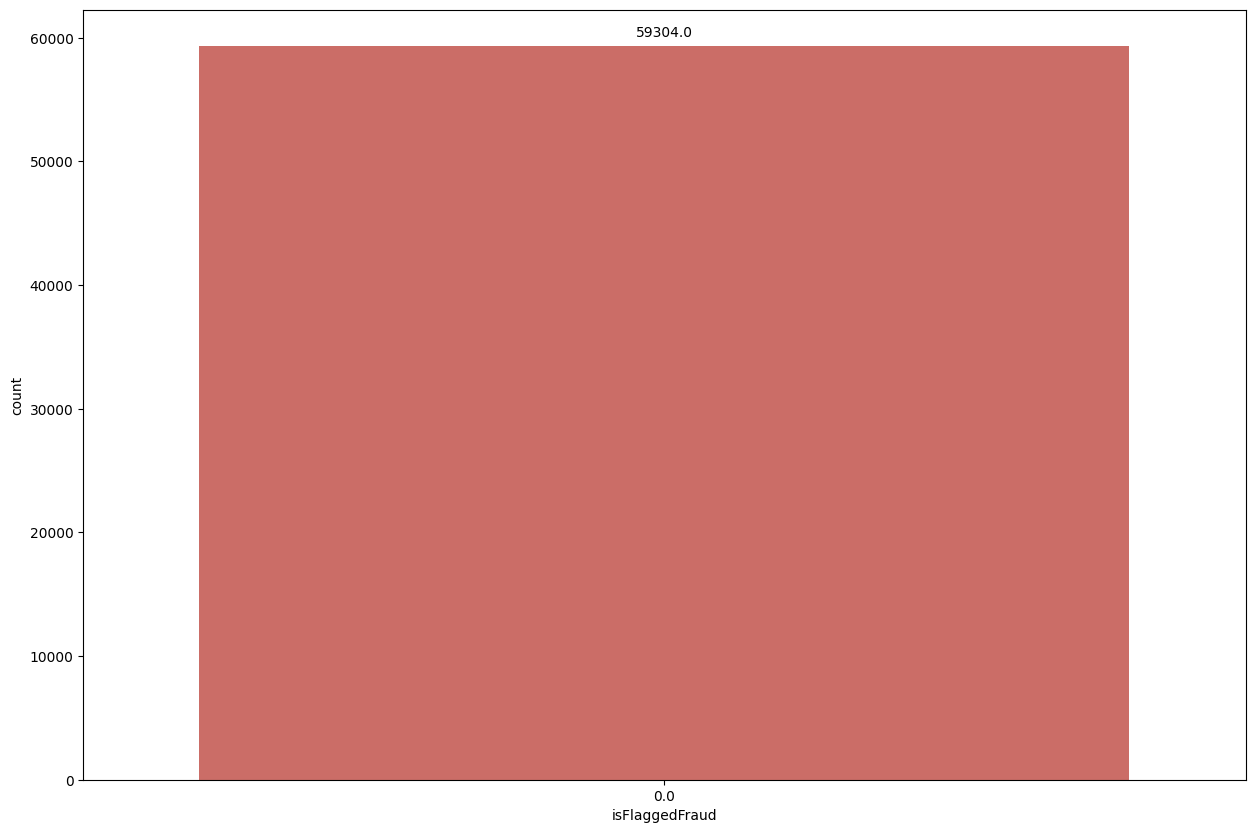

In [21]:
for i in discrete:
    plt.figure(figsize=(15, 10))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='center')

    plt.show()

In [22]:
import plotly.express as px

for i in discrete:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

In [23]:
for i in categorical:
    print(i)
    print(df[i].unique())
    print()

type
['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']



In [24]:
for i in categorical:
    print(i)
    print(df[i].value_counts())
    print()

type
type
PAYMENT     25241
CASH_OUT    16910
CASH_IN     10952
TRANSFER     5488
DEBIT         713
Name: count, dtype: int64



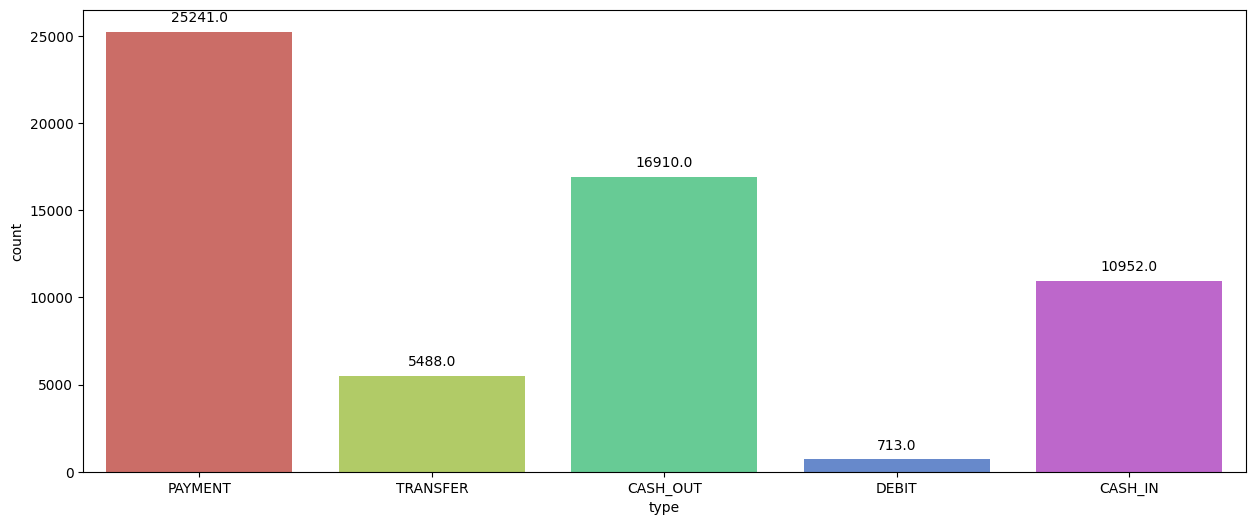

In [25]:
for i in categorical:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='center')

    plt.show()

In [26]:
for i in categorical:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

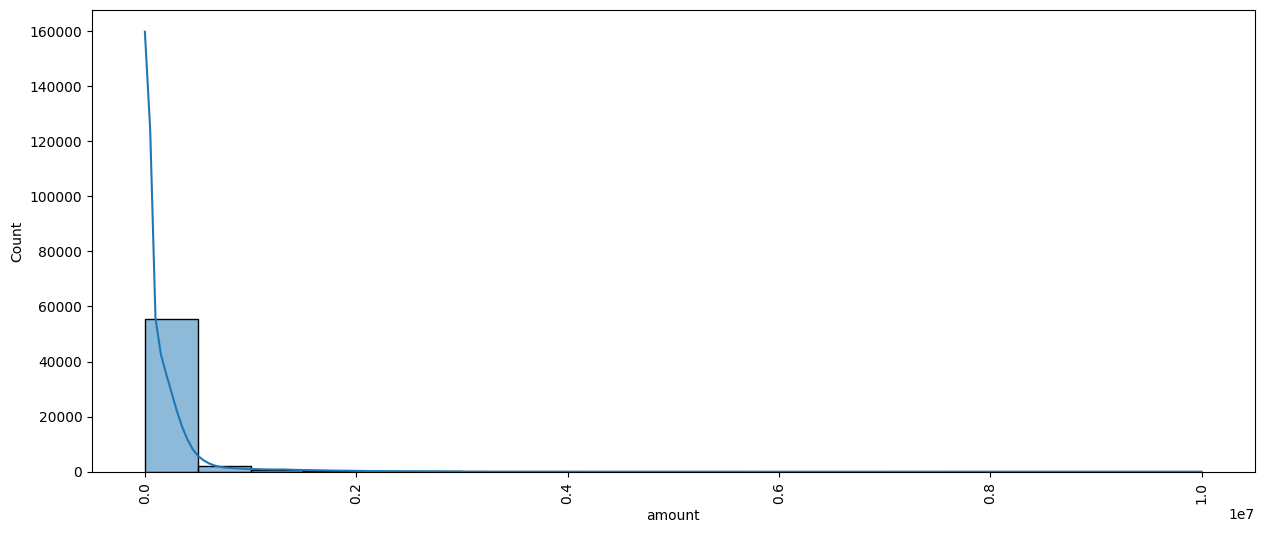

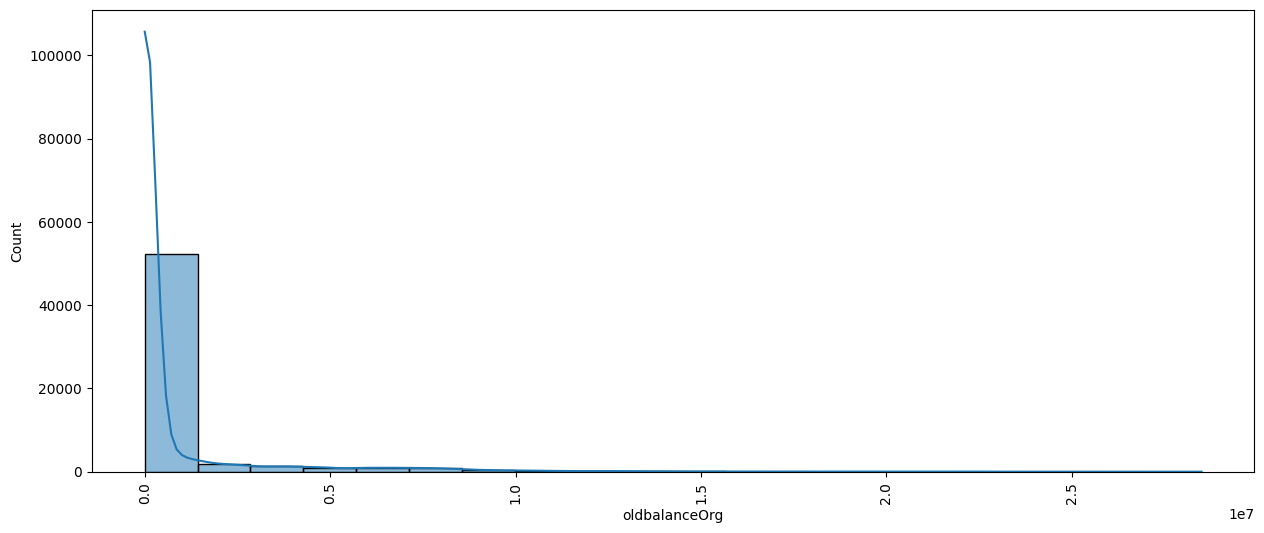

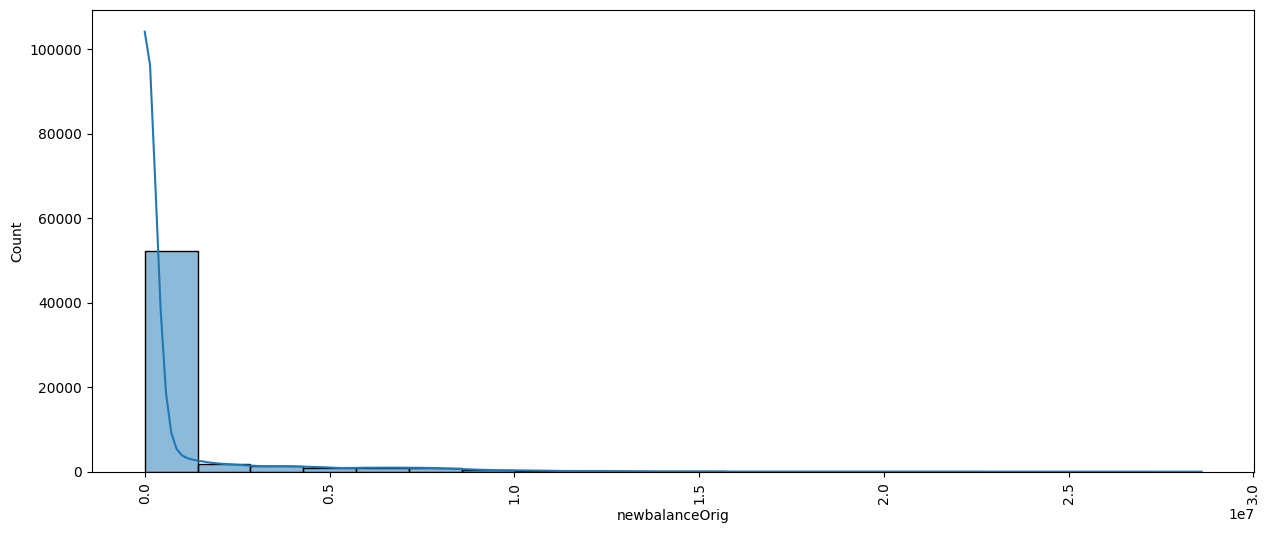

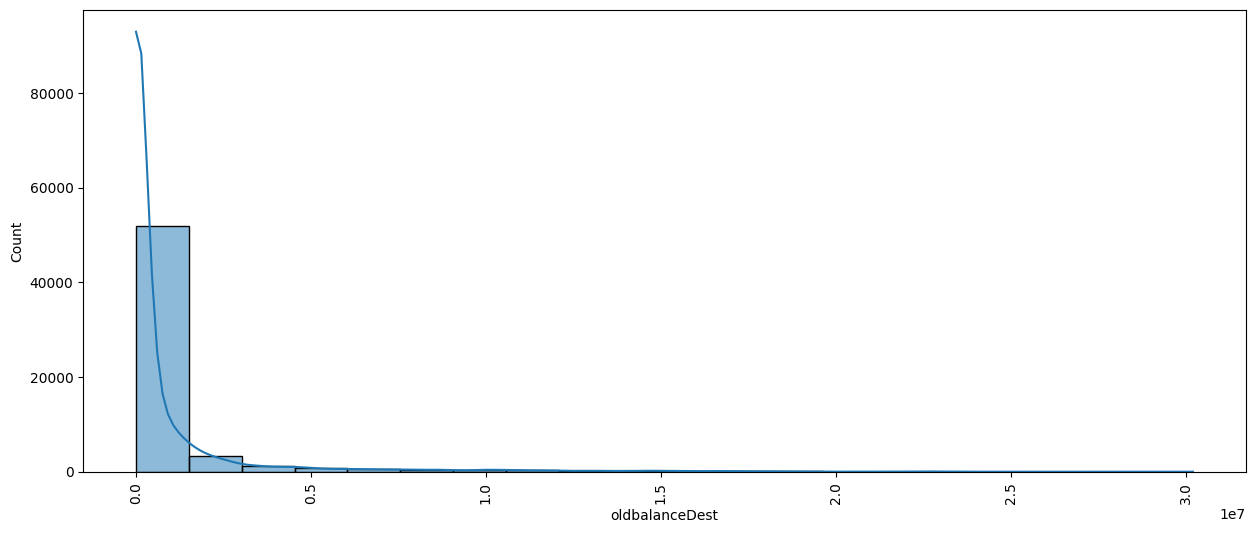

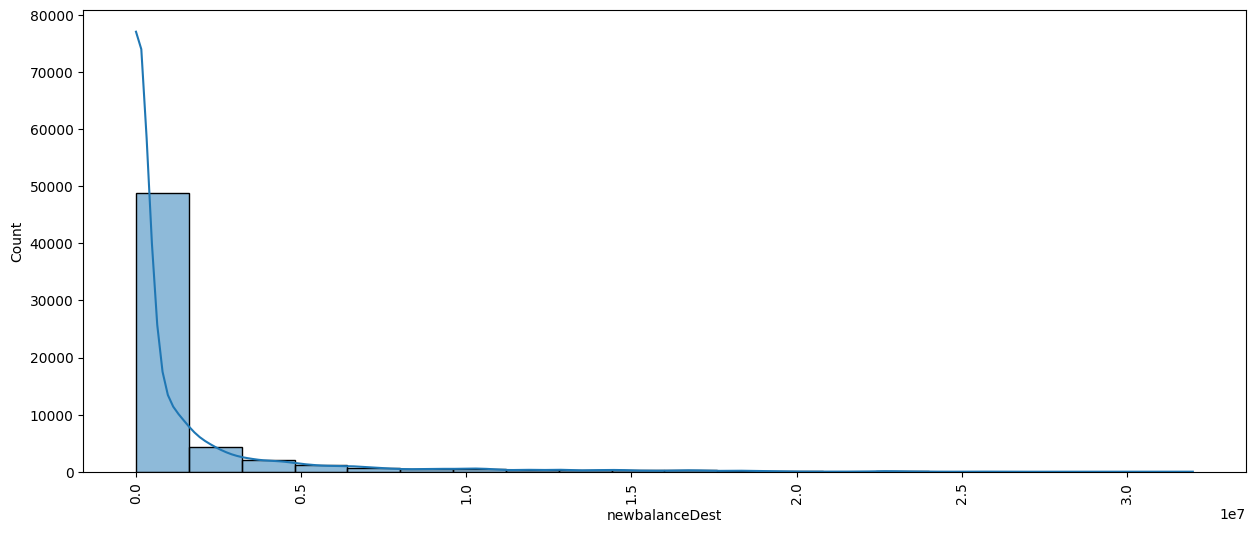

In [27]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins = 20, kde = True, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

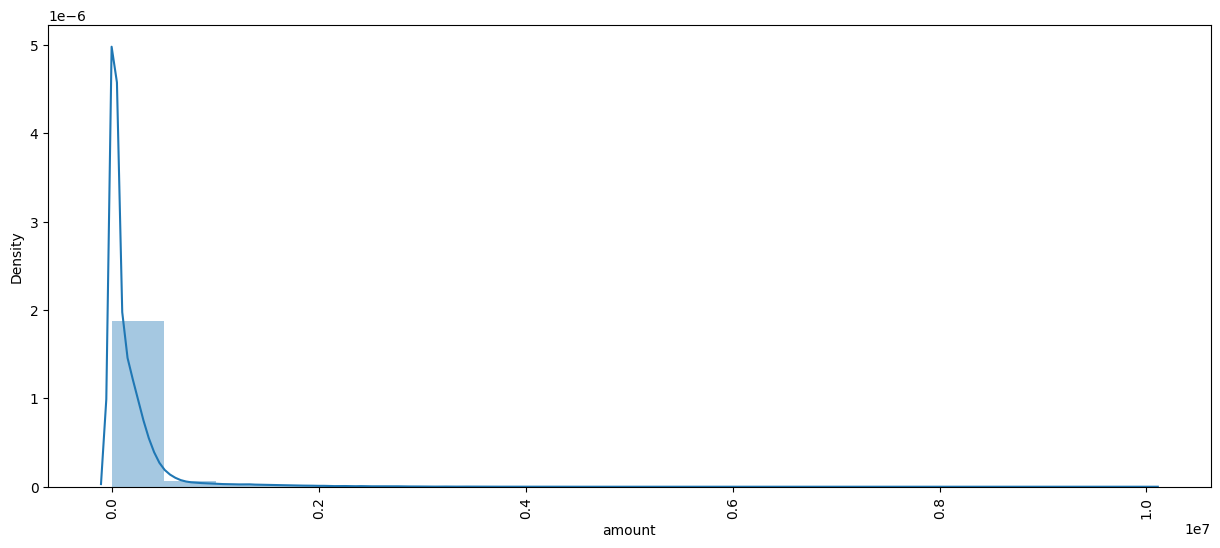

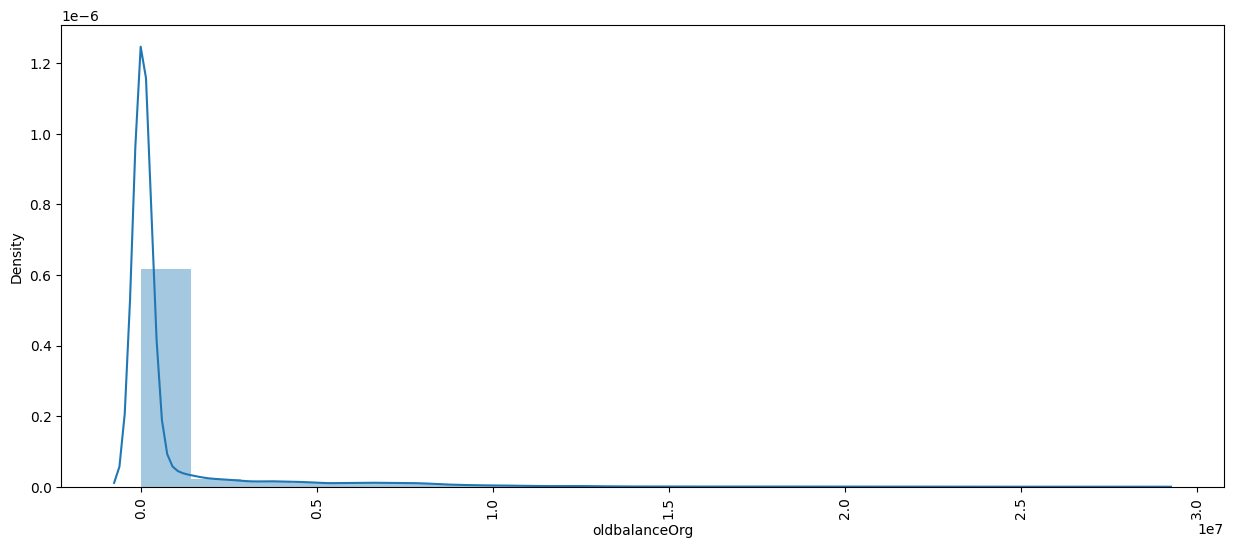

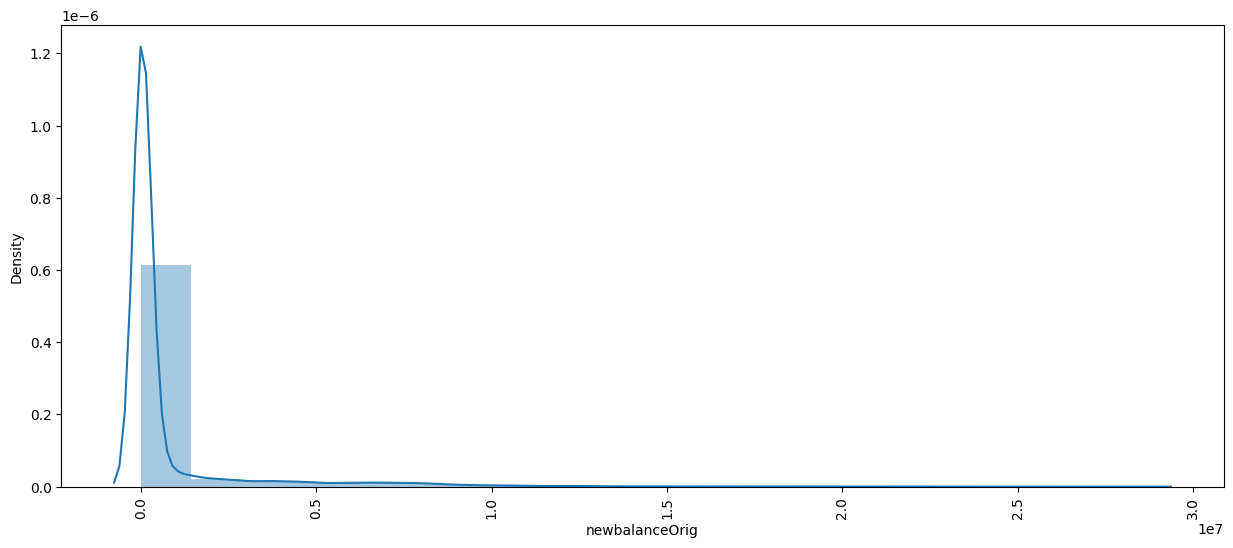

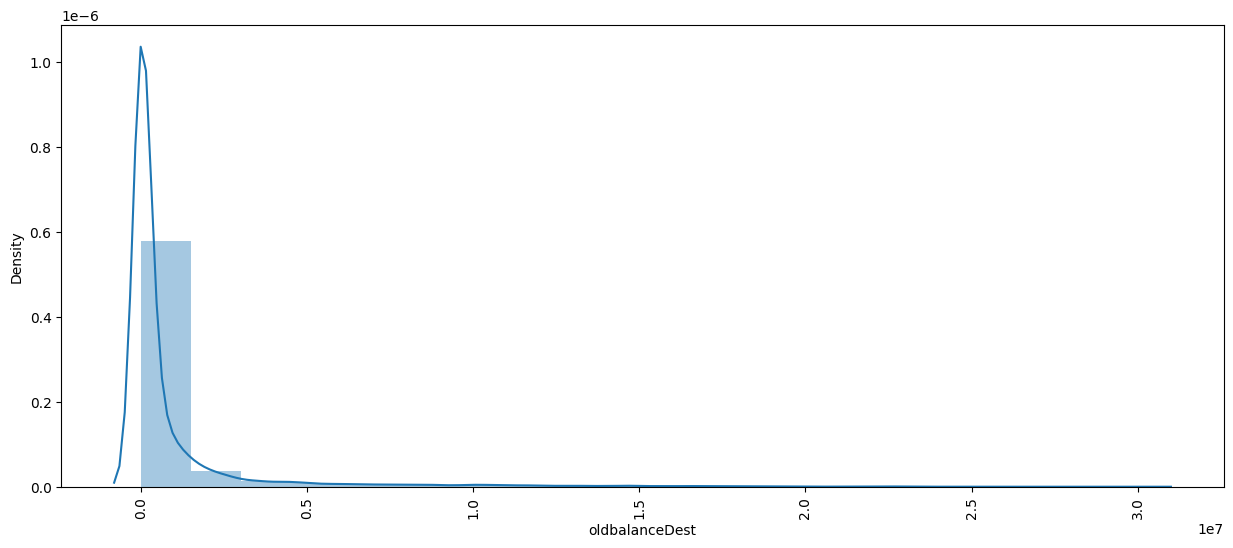

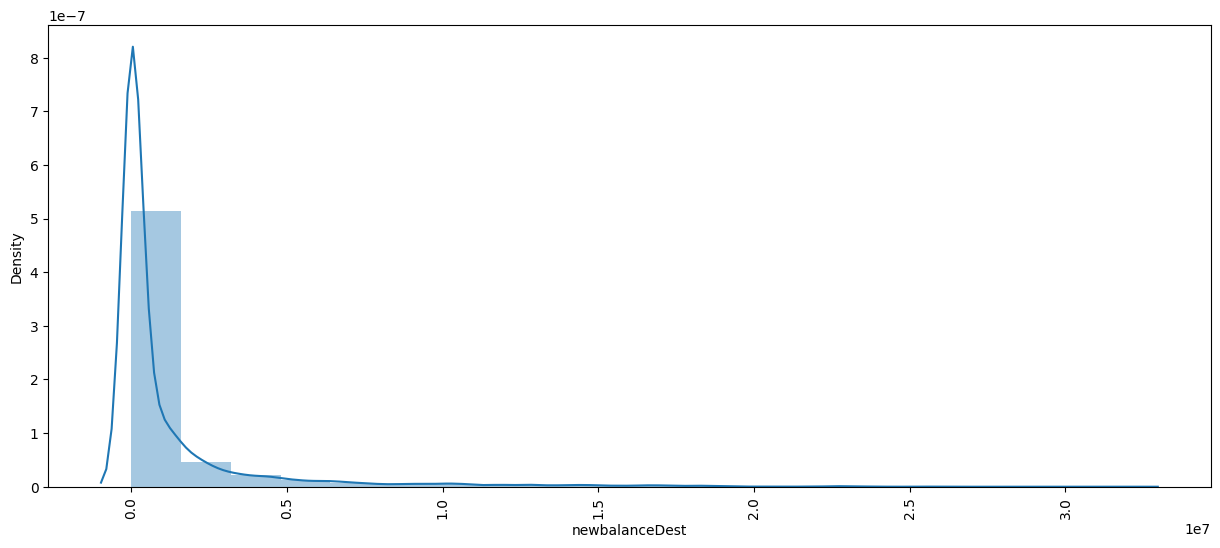

In [28]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], bins = 20, kde = True)
    plt.xticks(rotation = 90)
    plt.show()

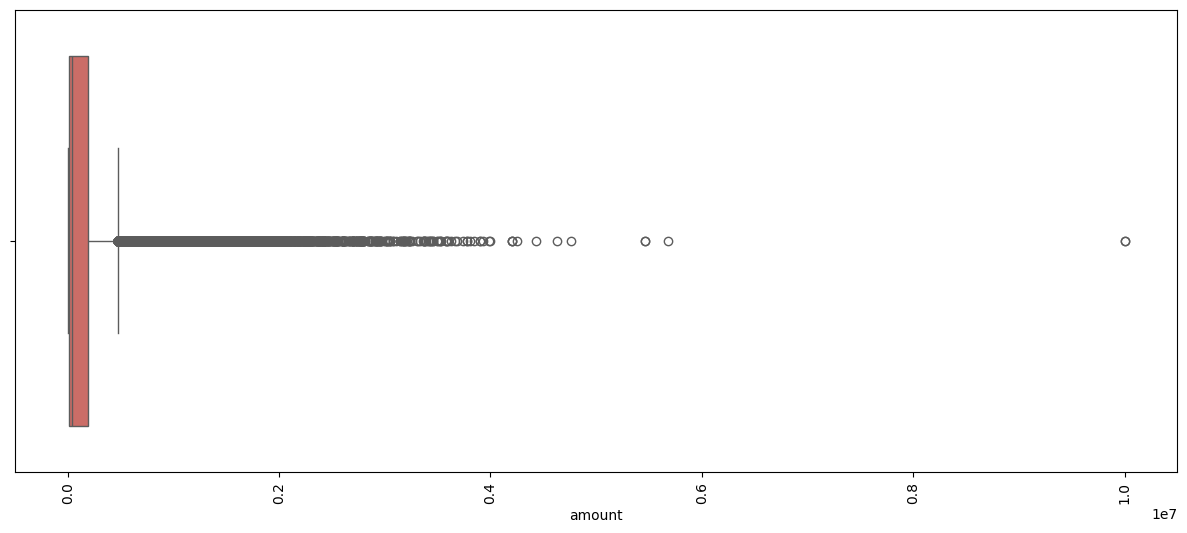

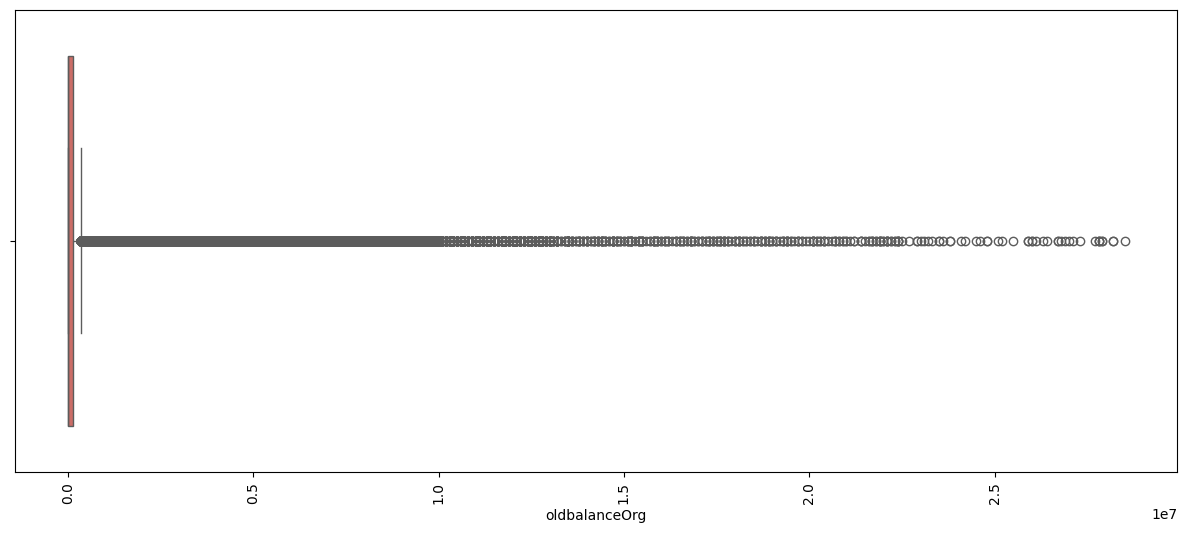

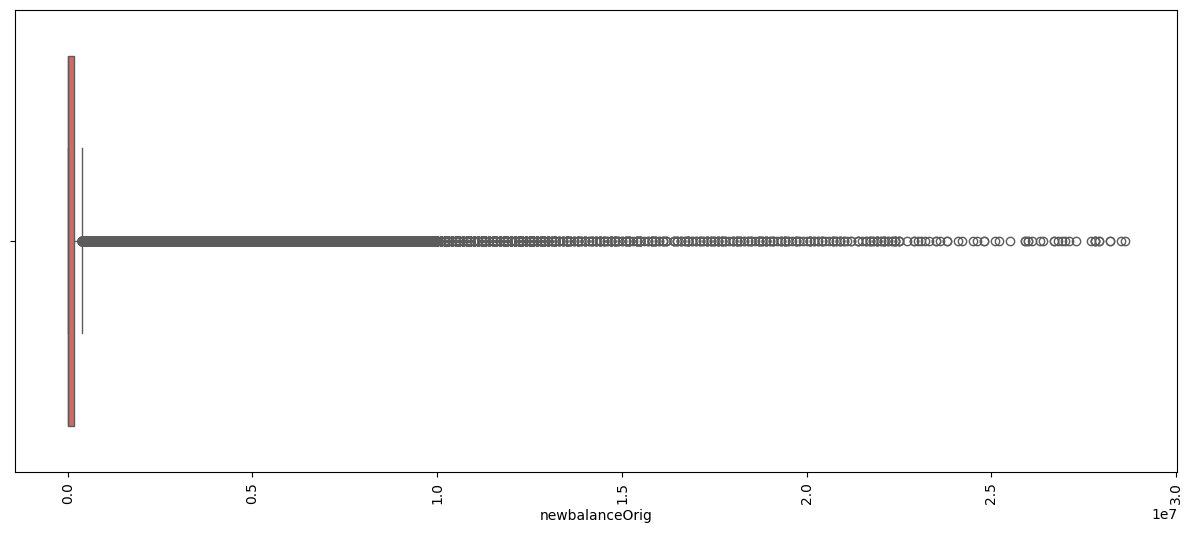

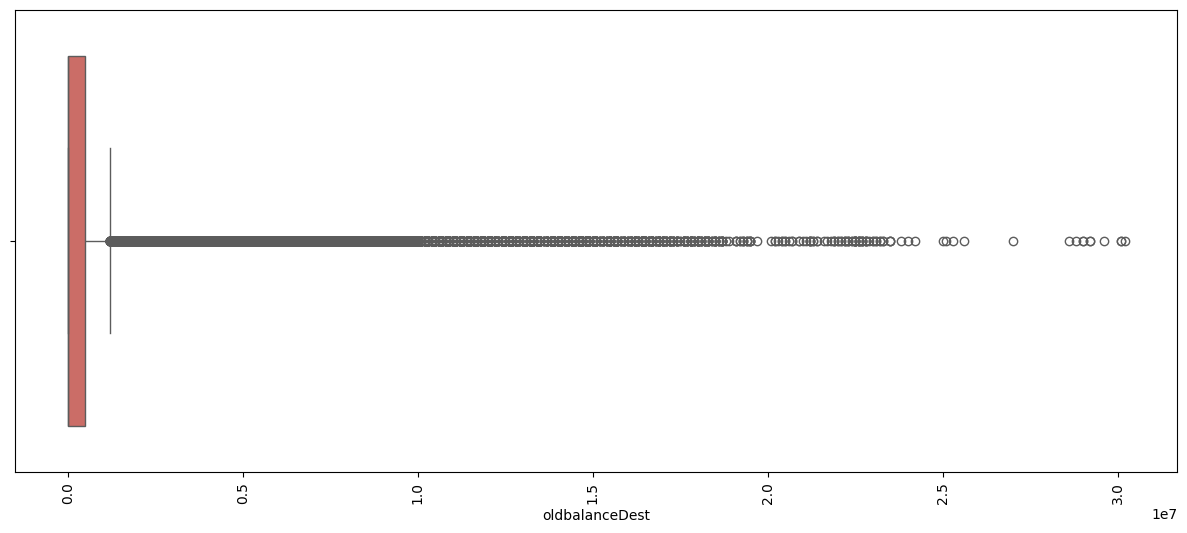

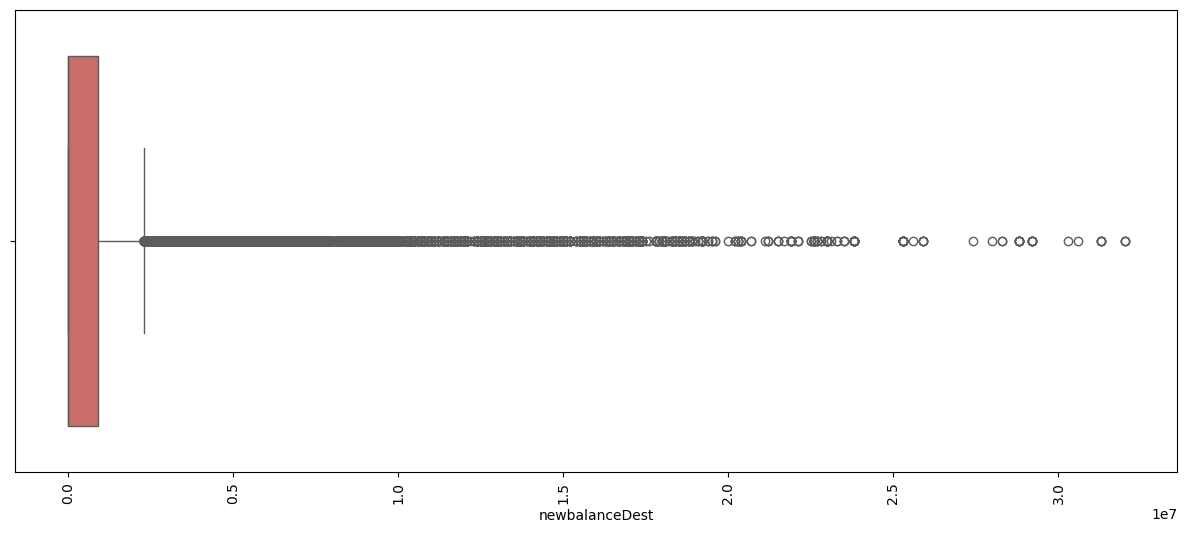

In [29]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

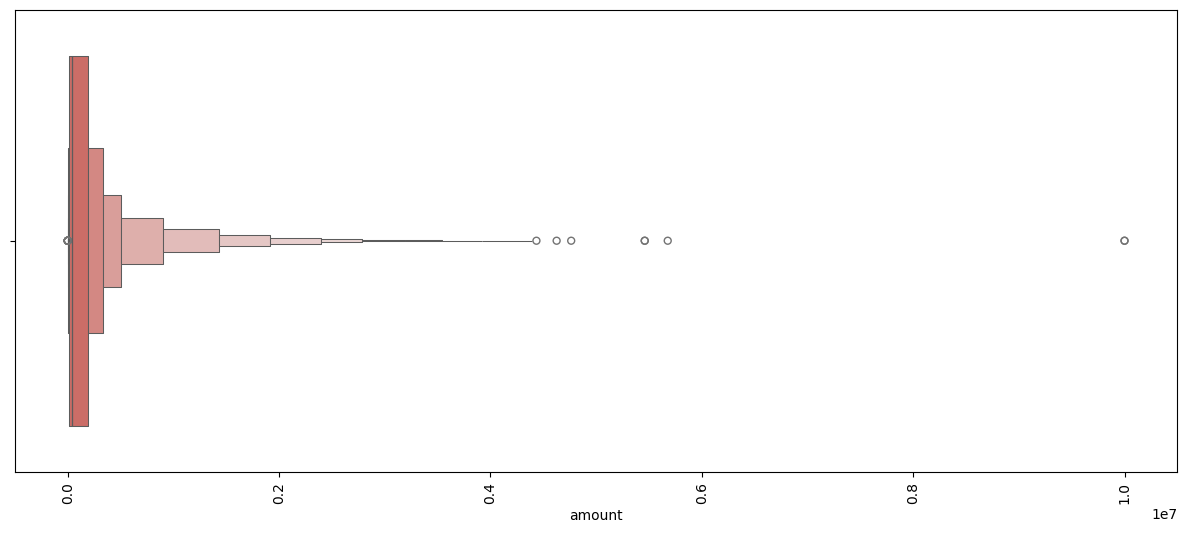

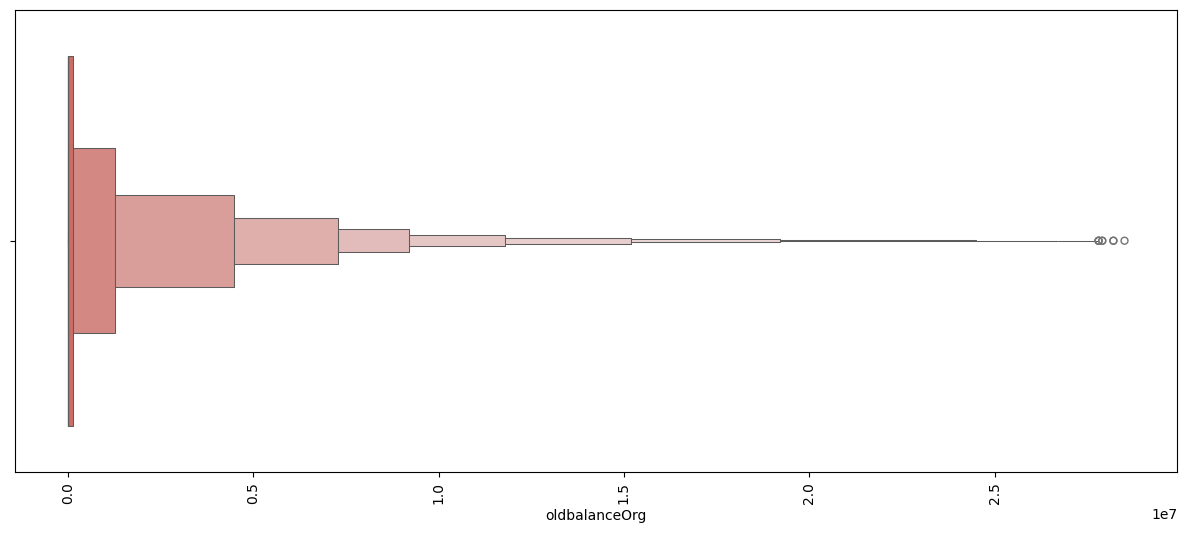

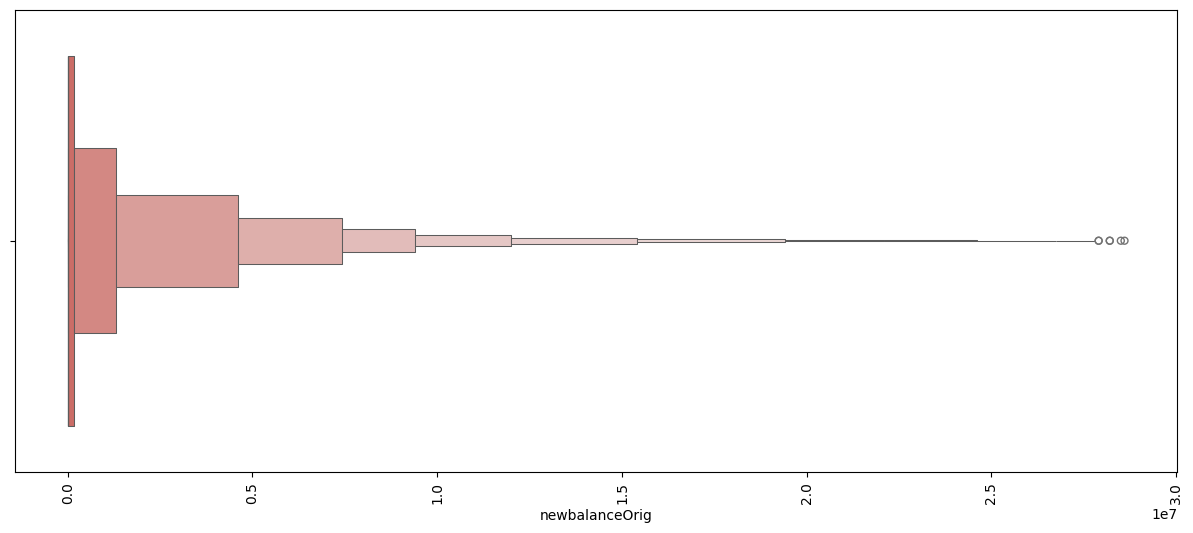

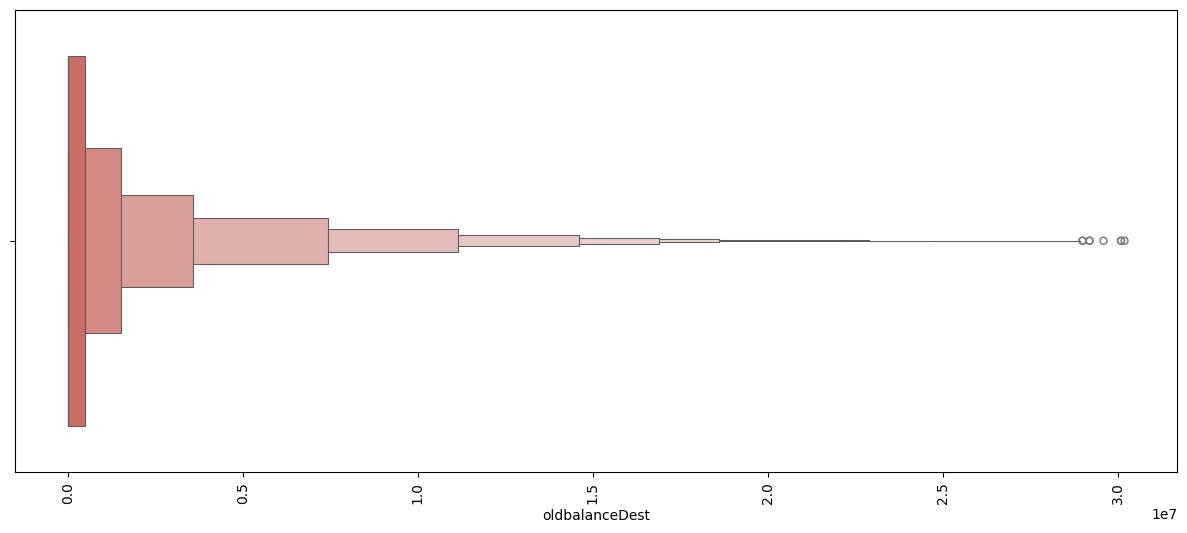

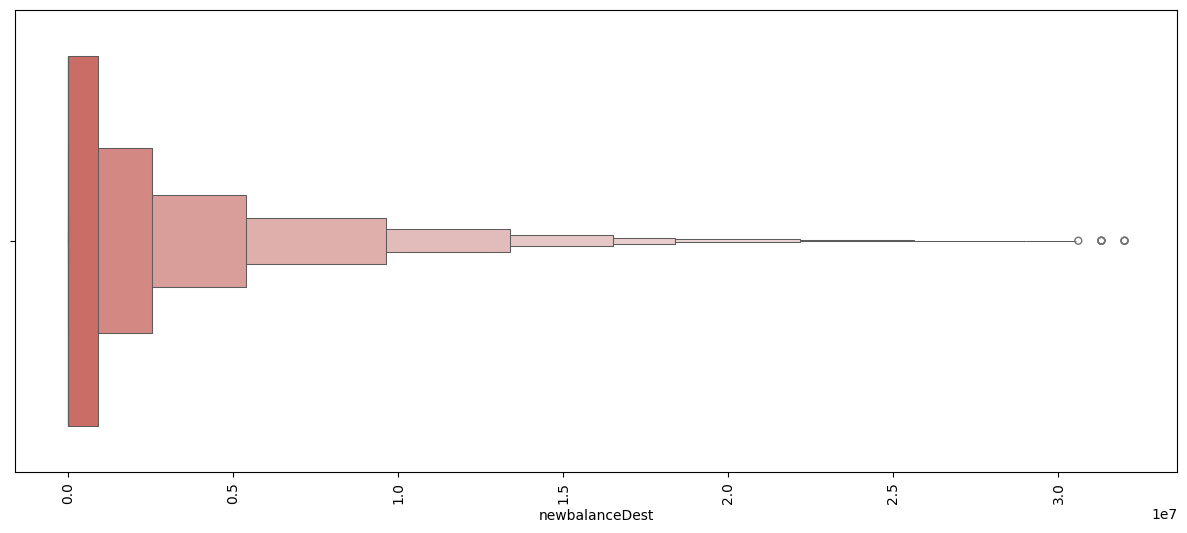

In [30]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxenplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

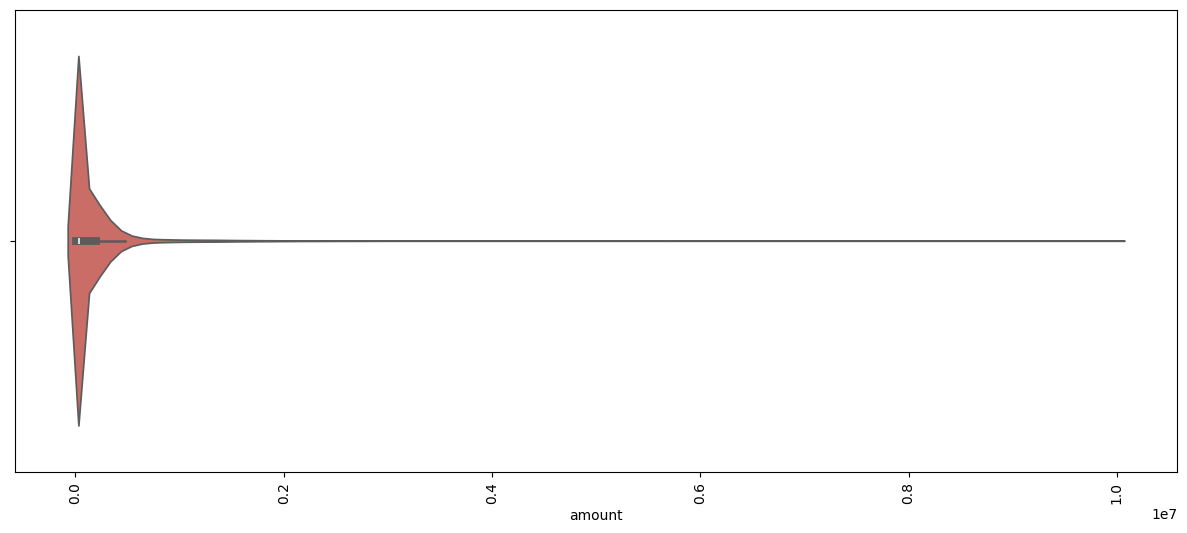

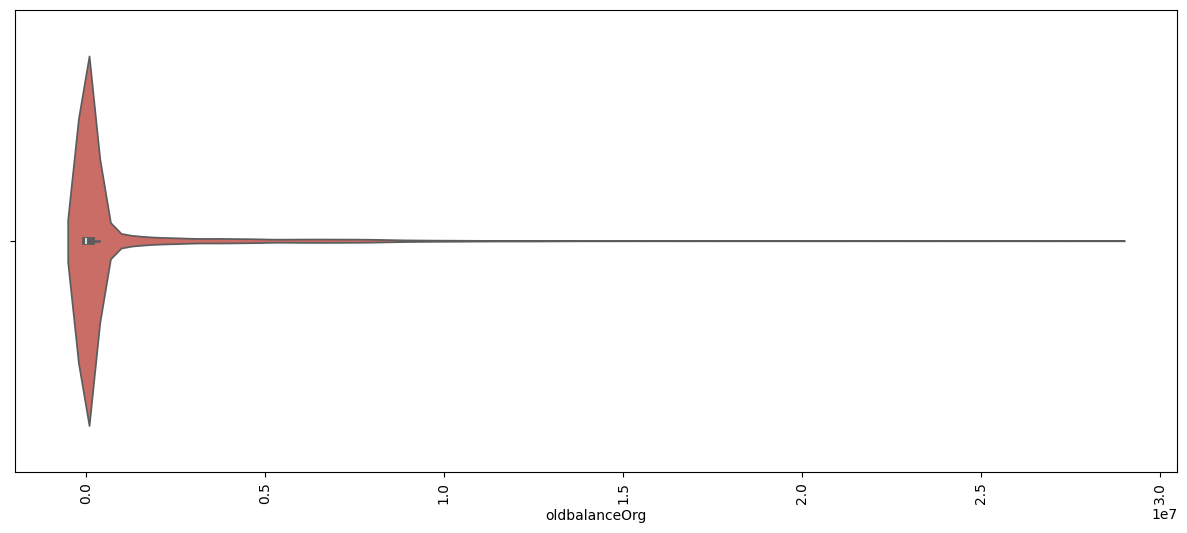

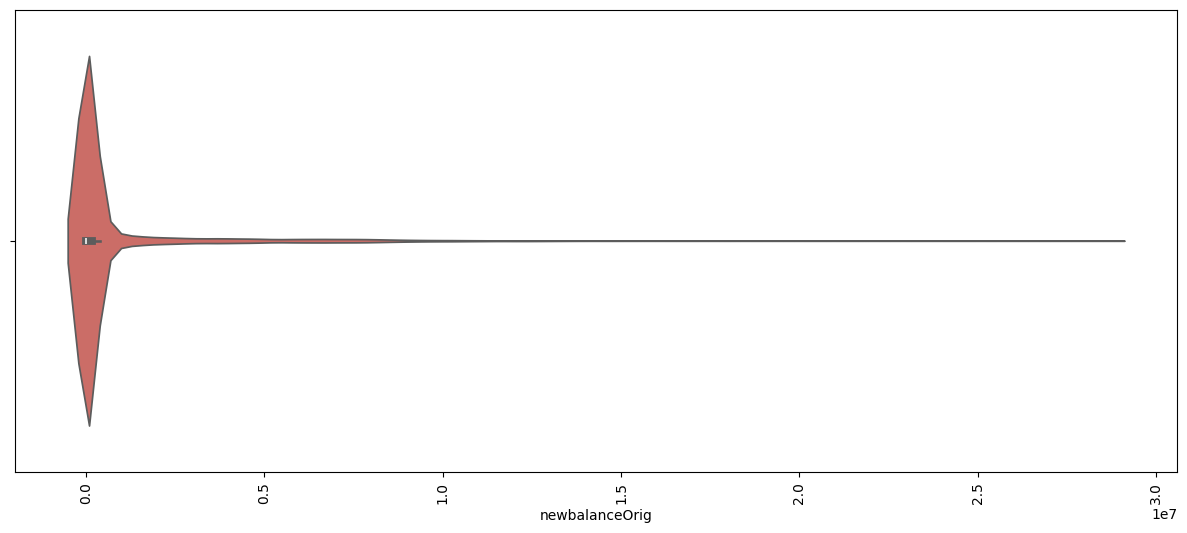

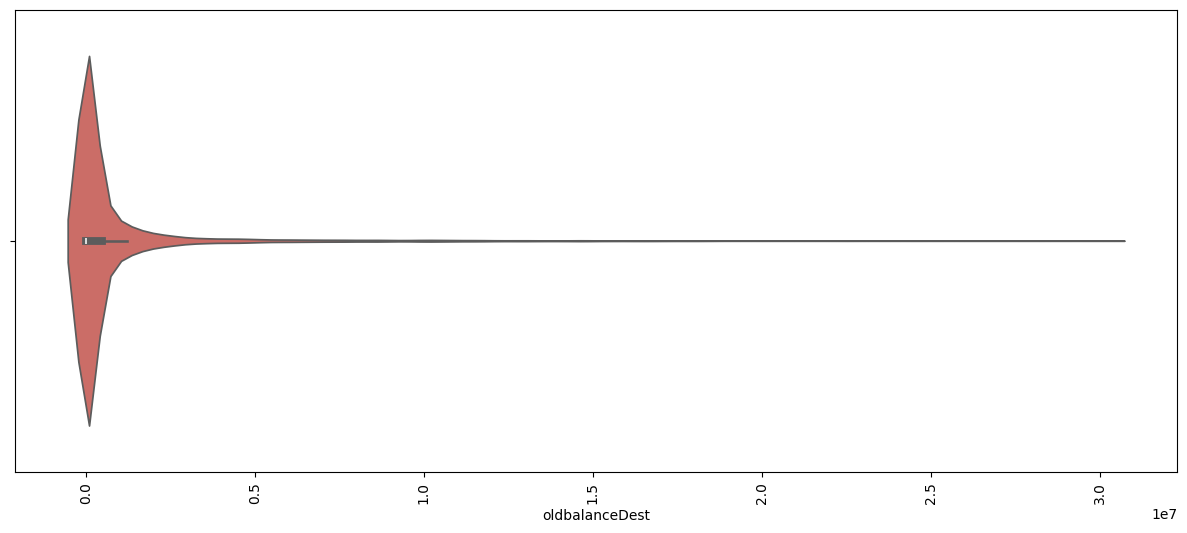

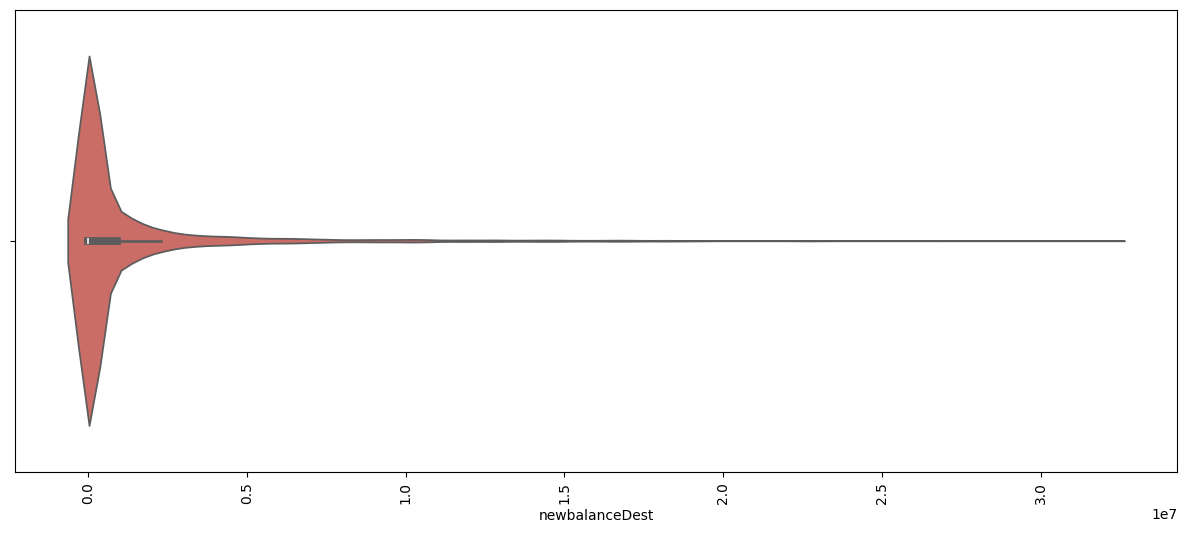

In [31]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.violinplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

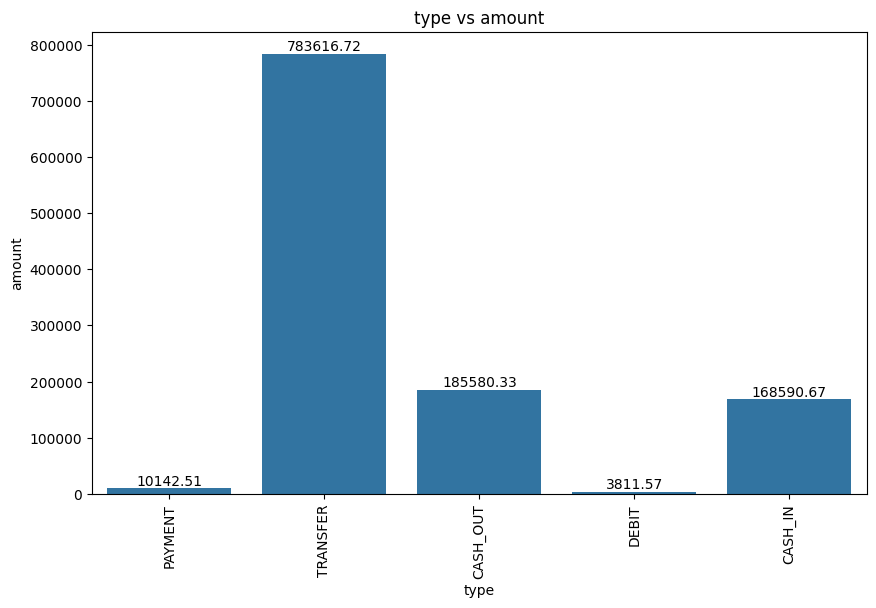

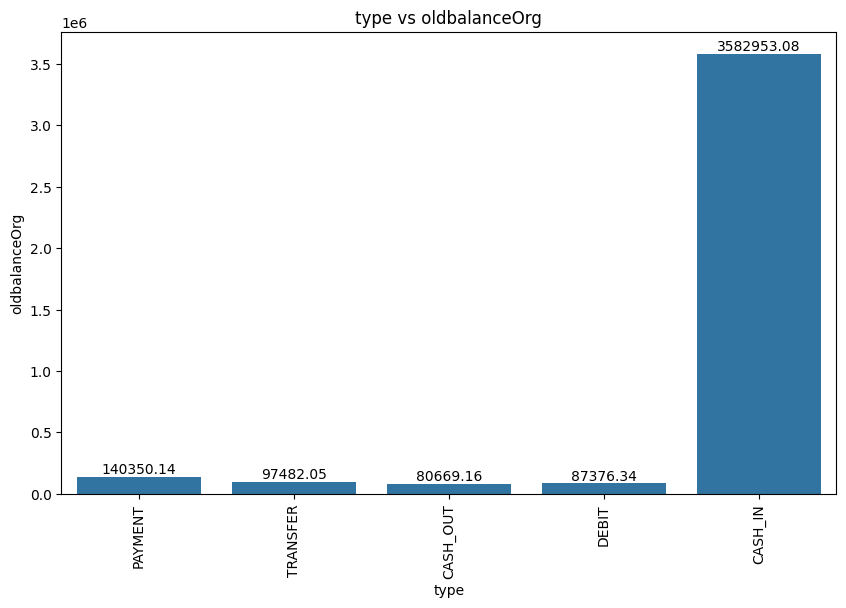

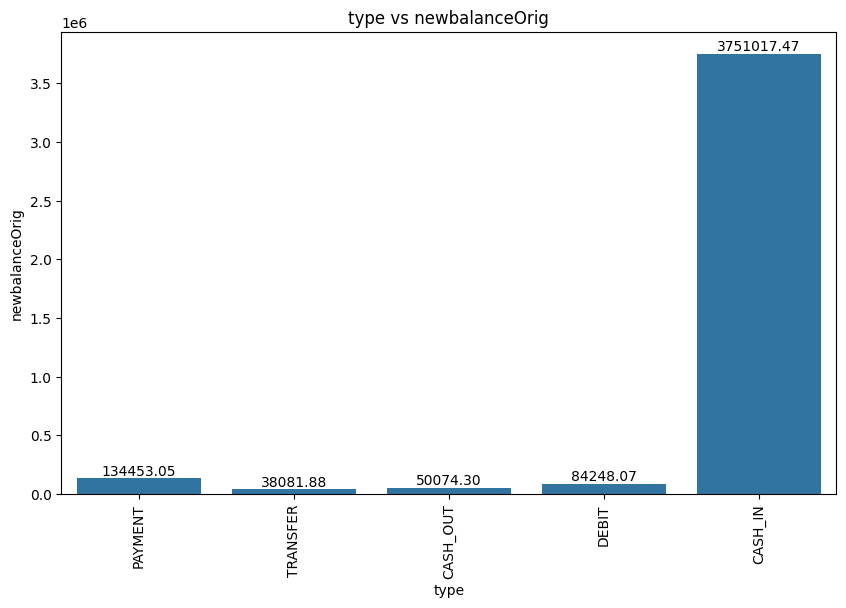

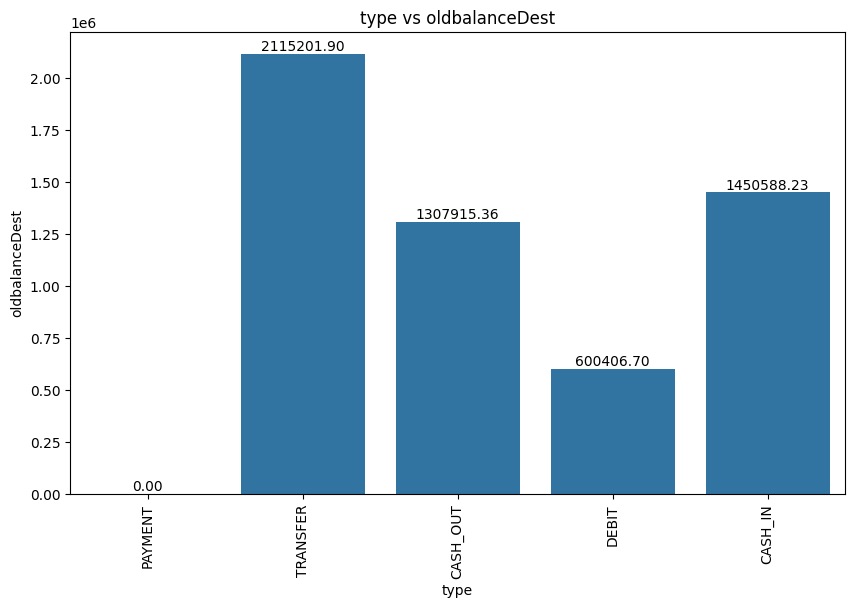

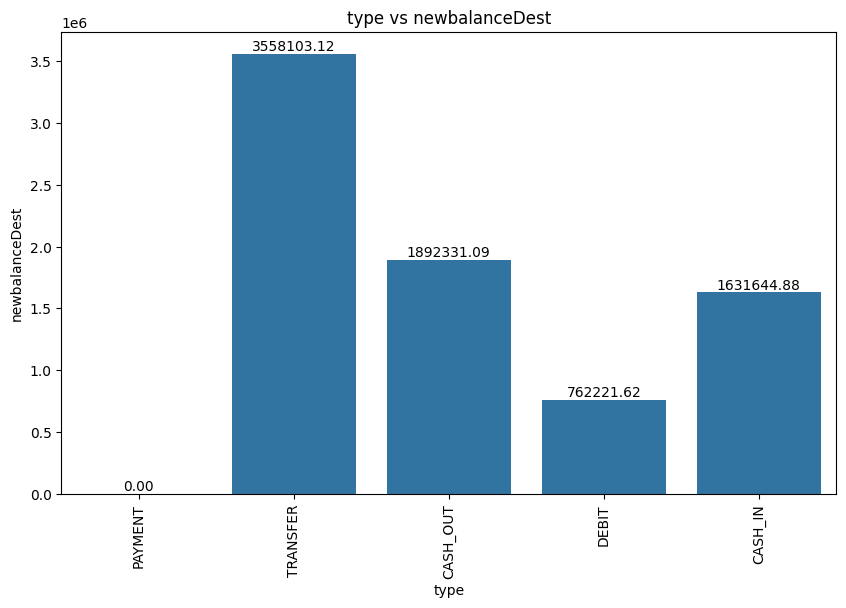

In [32]:
for cat in categorical:
    for cont in continuous:
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=df, x=cat, y=cont, ci=None)
        plt.title(f'{cat} vs {cont}')

        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black', rotation=0)
        plt.xticks(rotation = 90)
        plt.show()

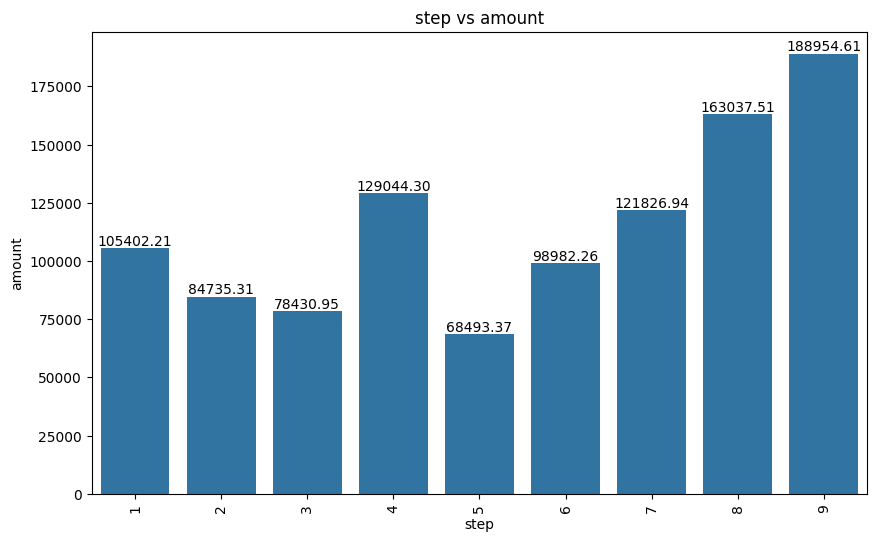

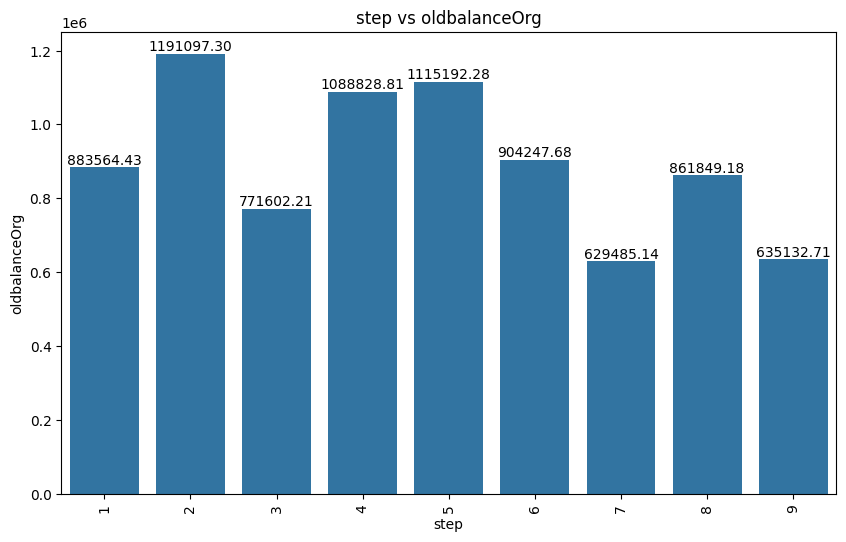

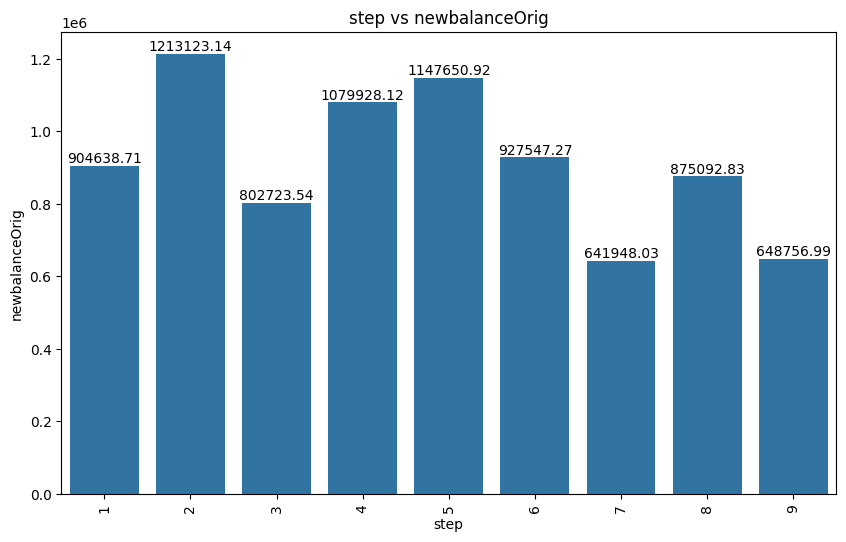

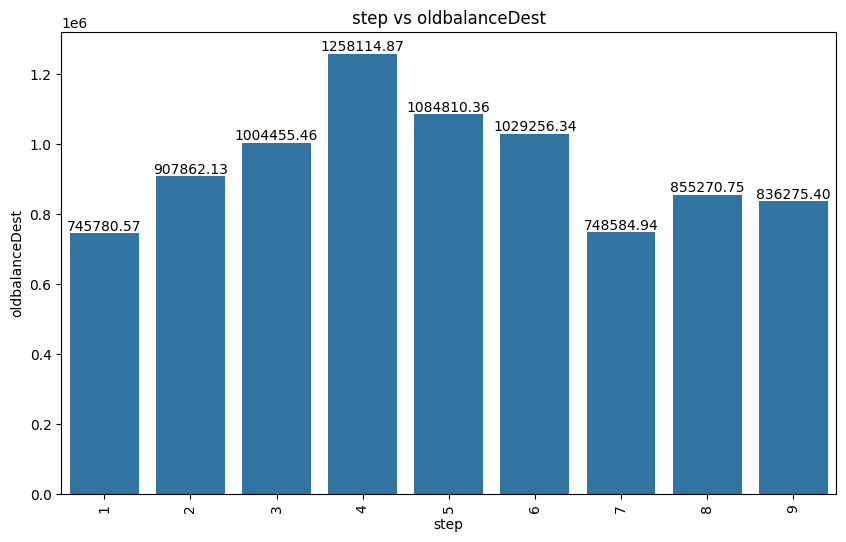

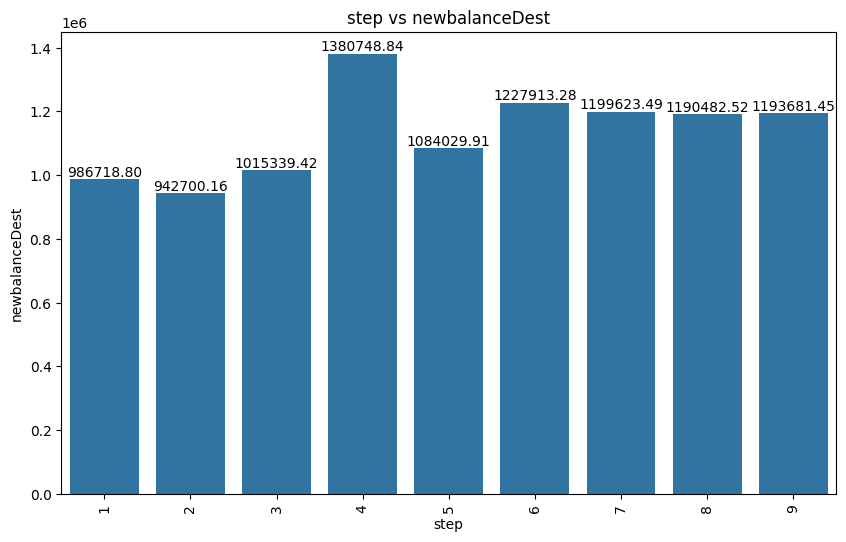

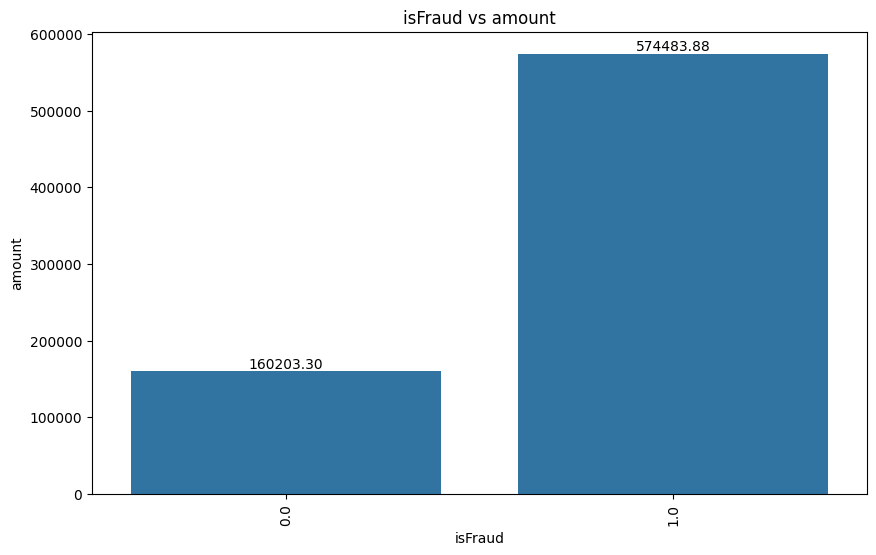

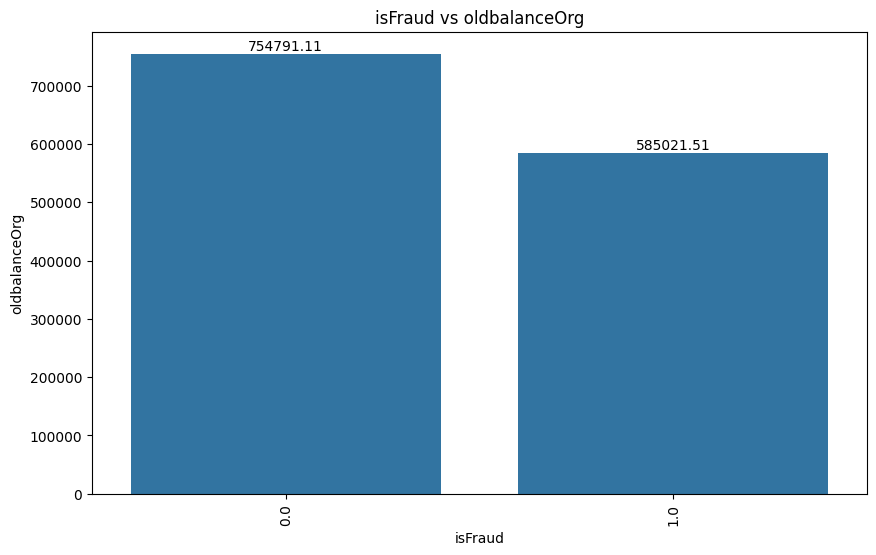

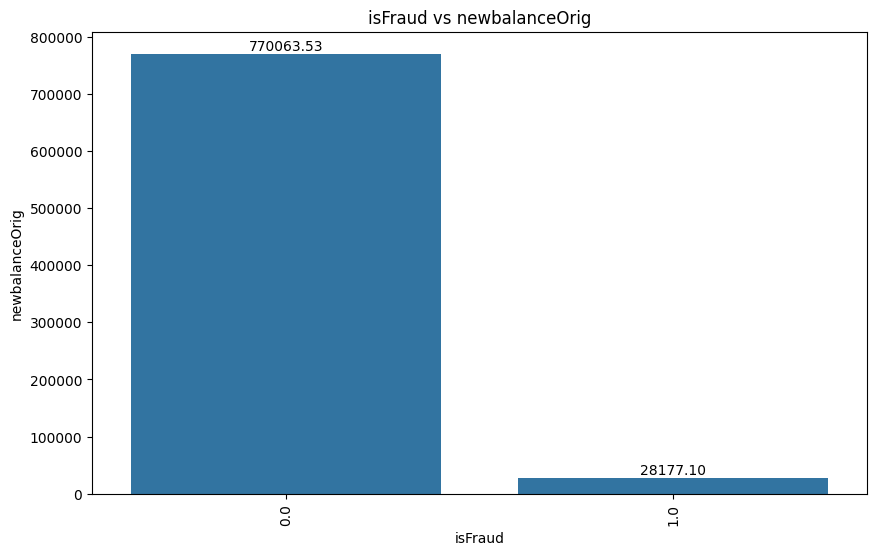

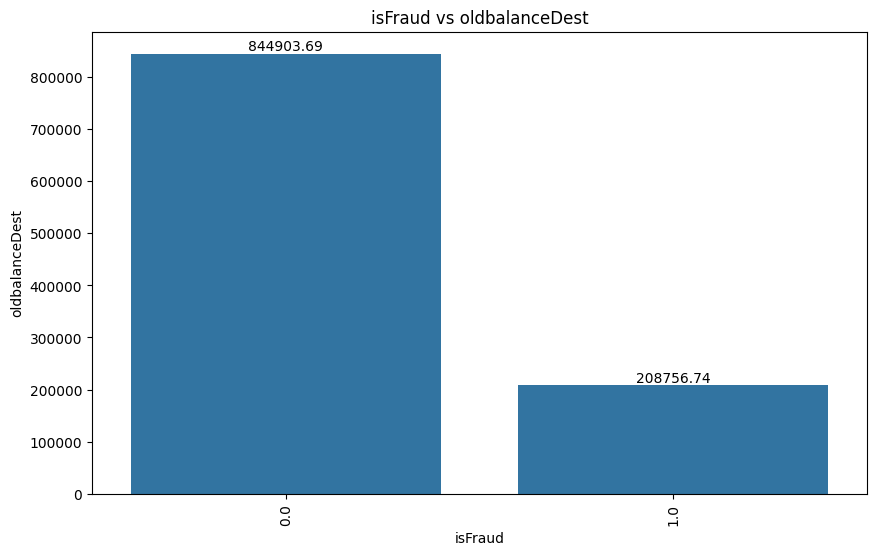

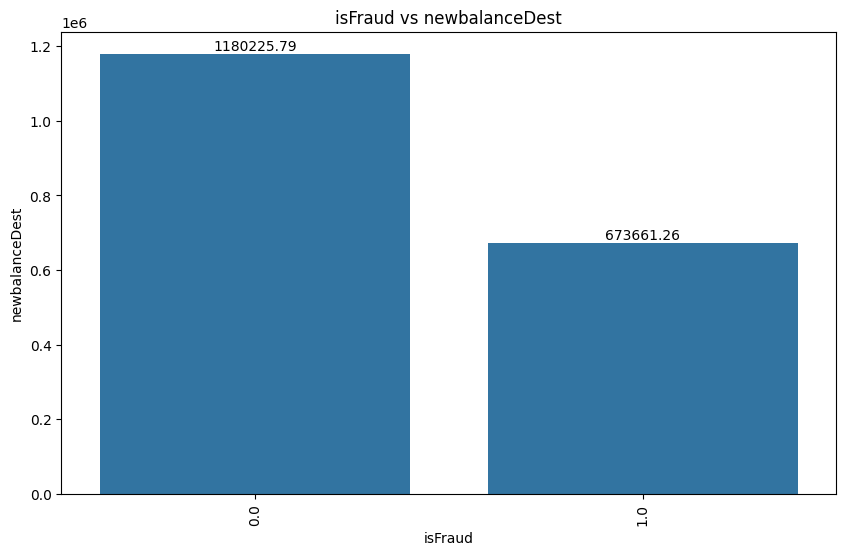

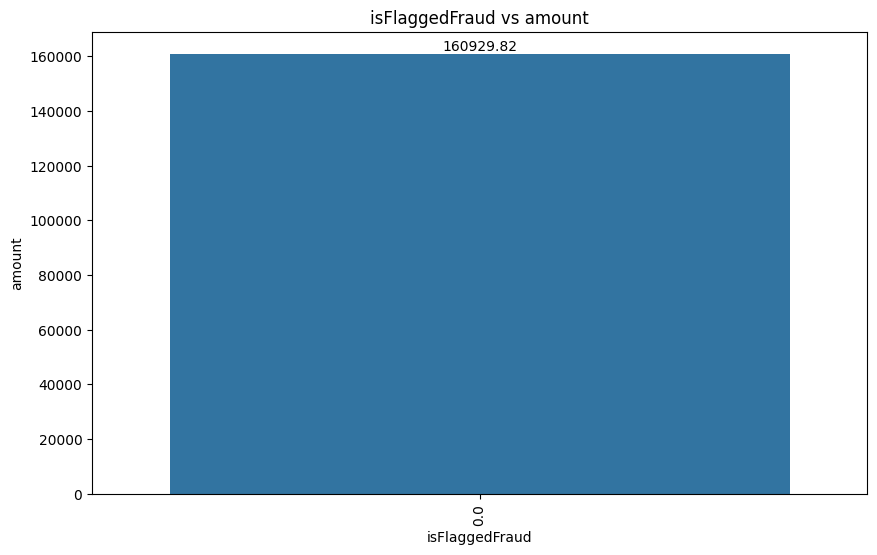

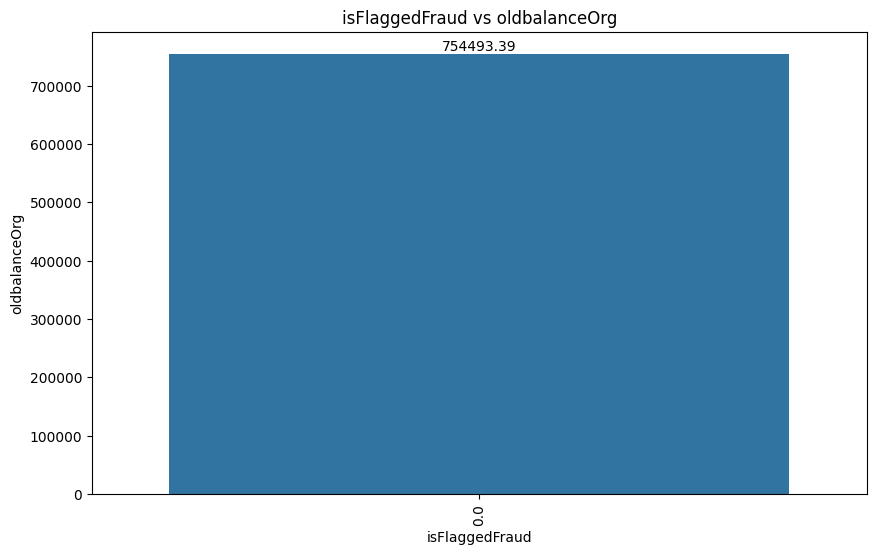

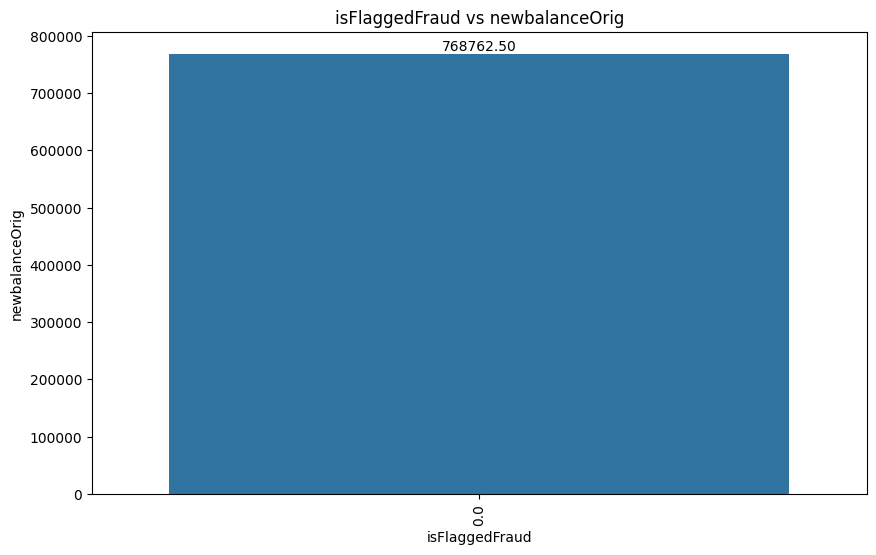

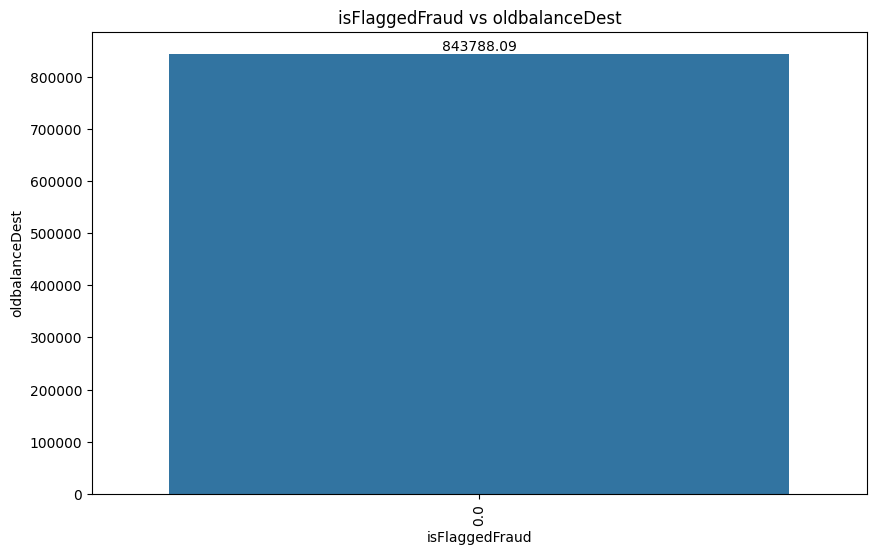

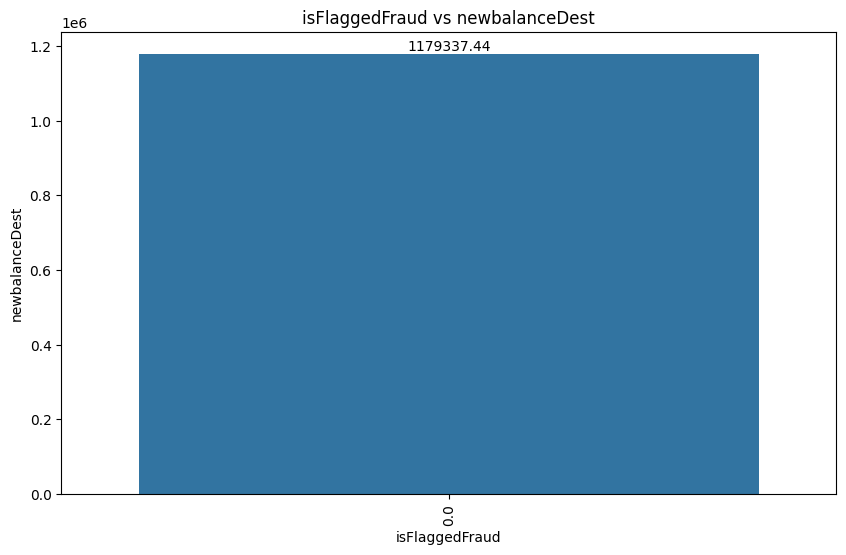

In [33]:
for cat in discrete:
    for cont in continuous:
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=df, x=cat, y=cont, ci=None)
        plt.title(f'{cat} vs {cont}')

        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black', rotation=0)
        plt.xticks(rotation = 90)
        plt.show()

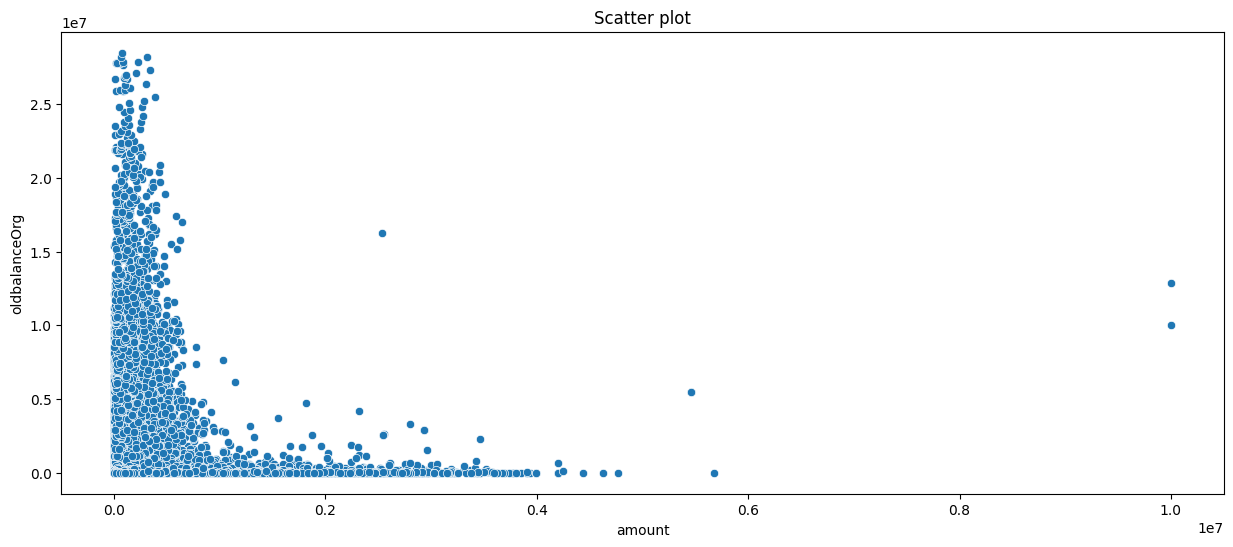

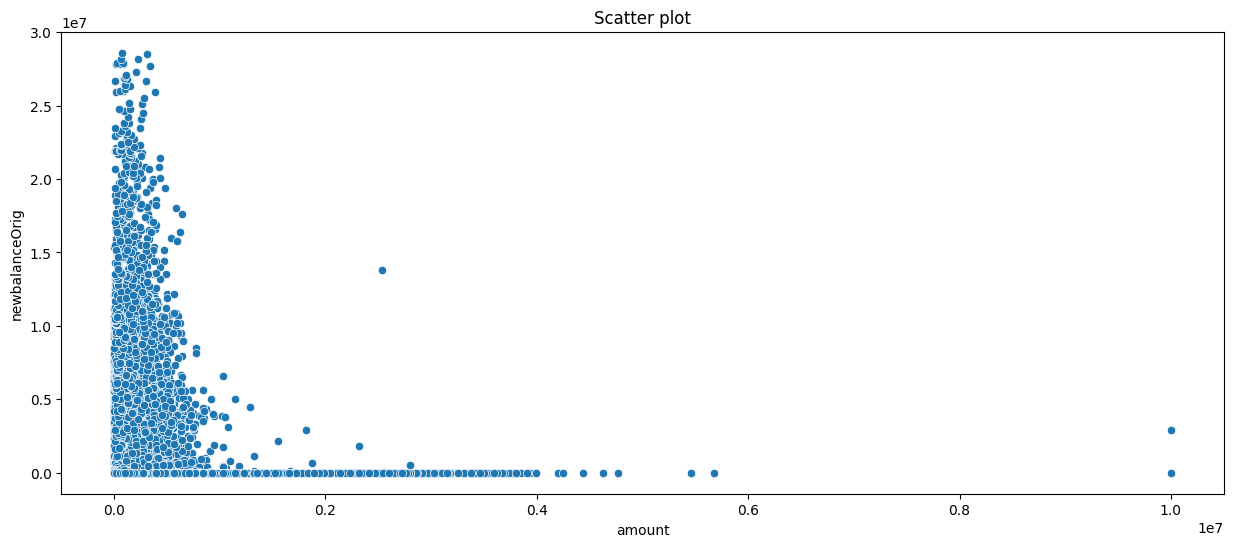

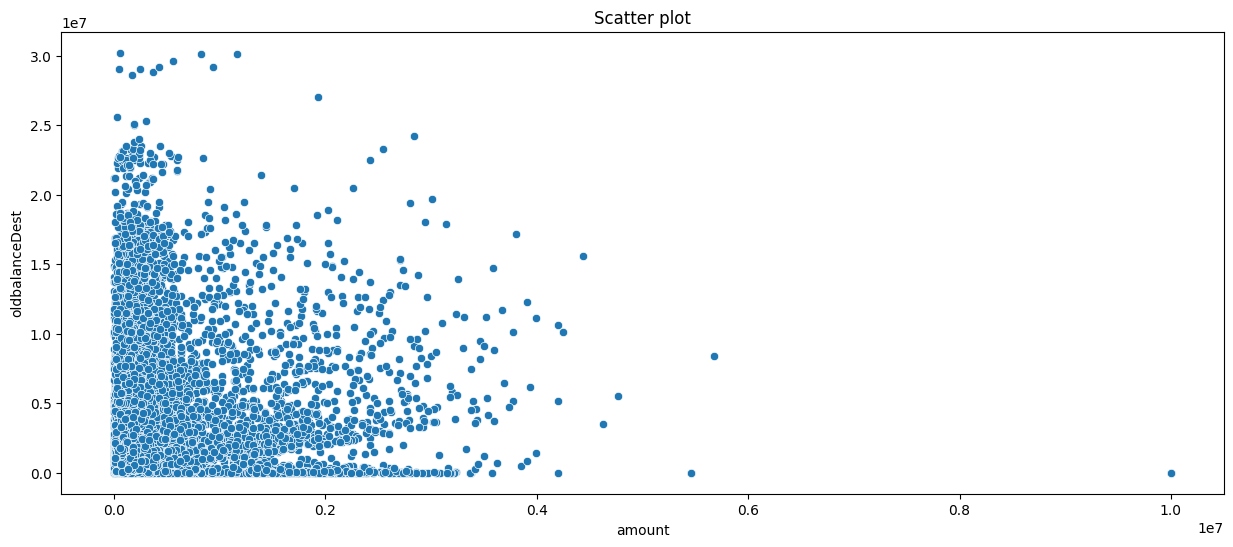

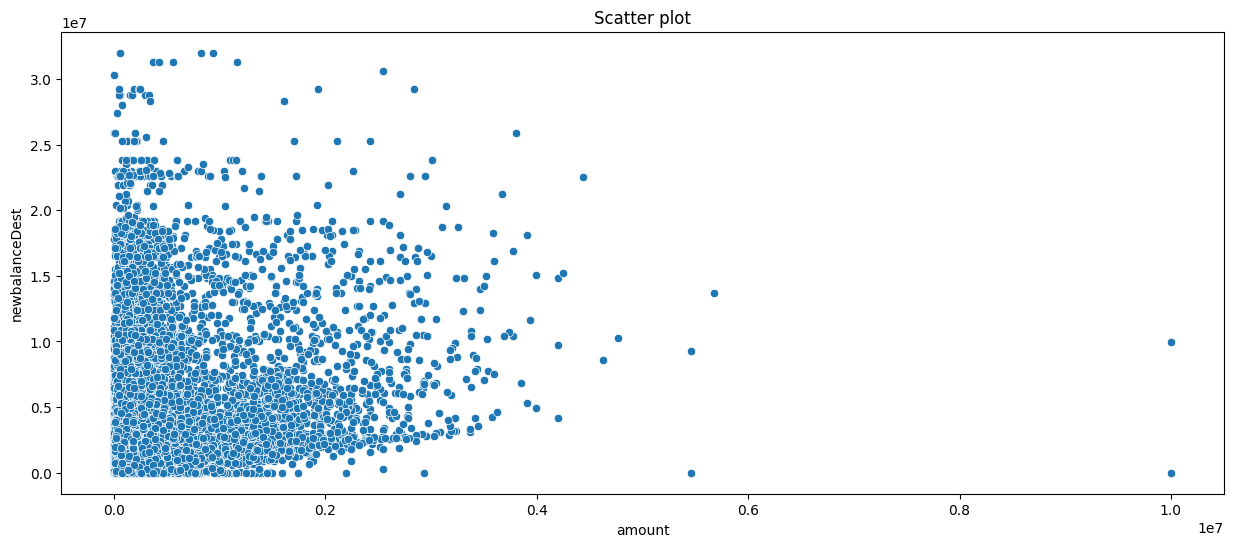

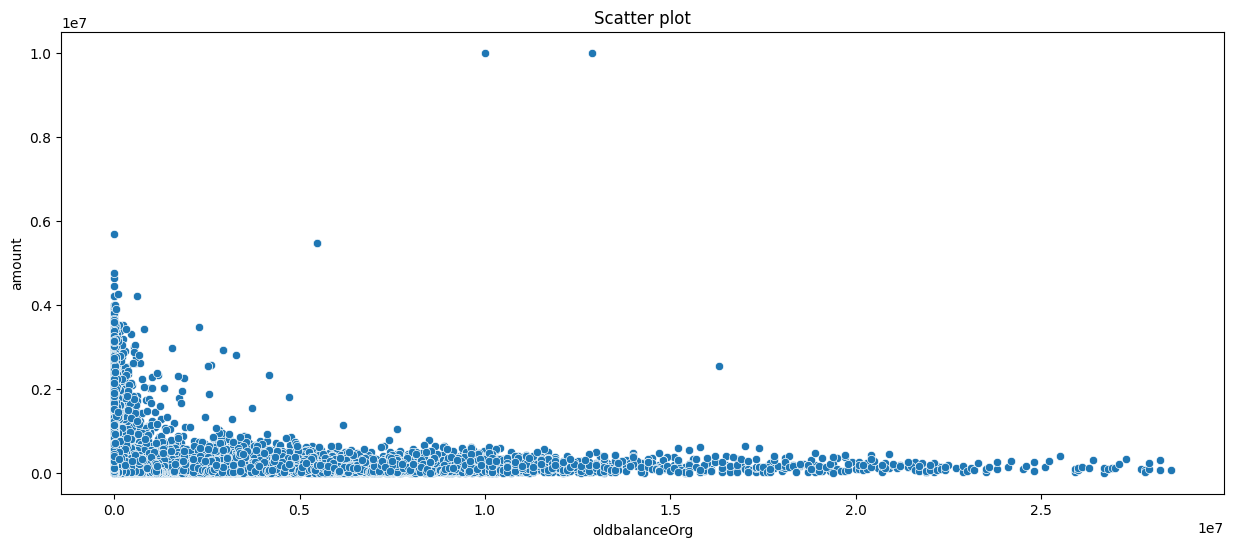

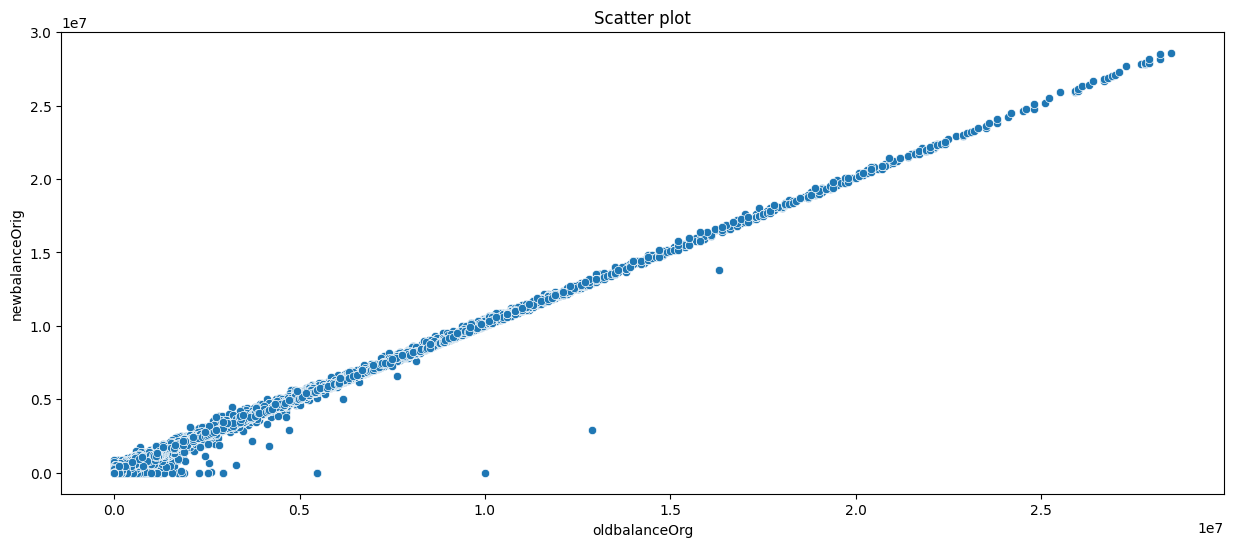

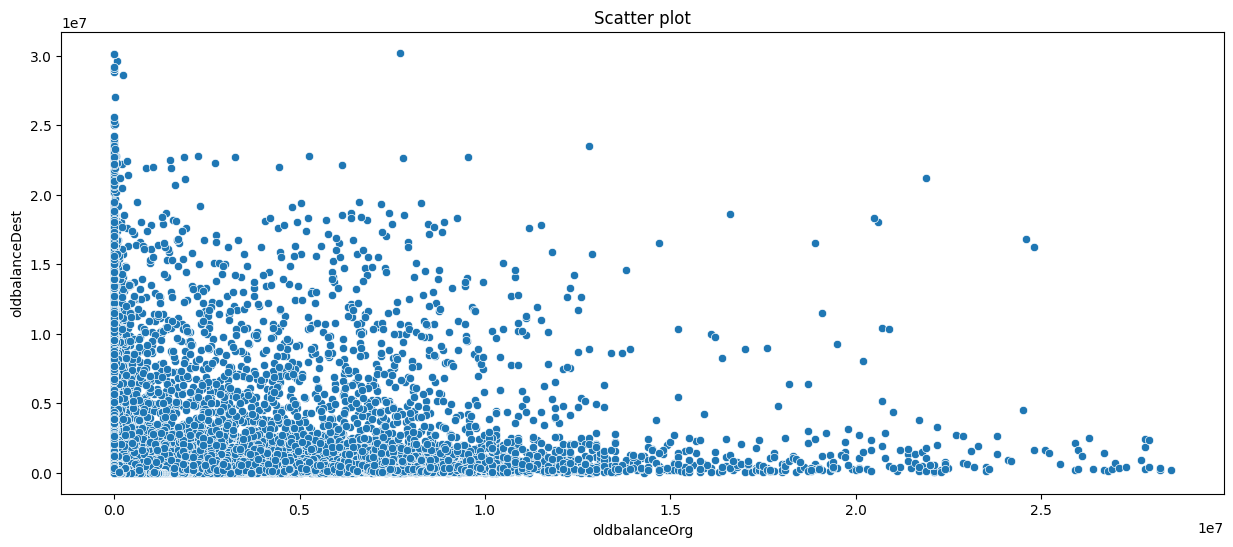

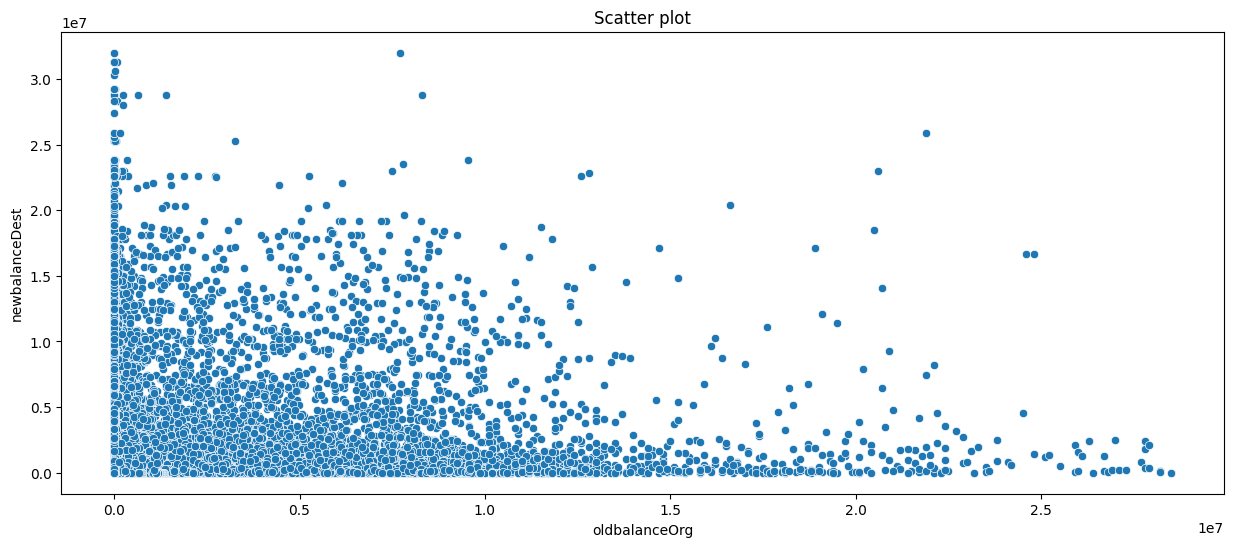

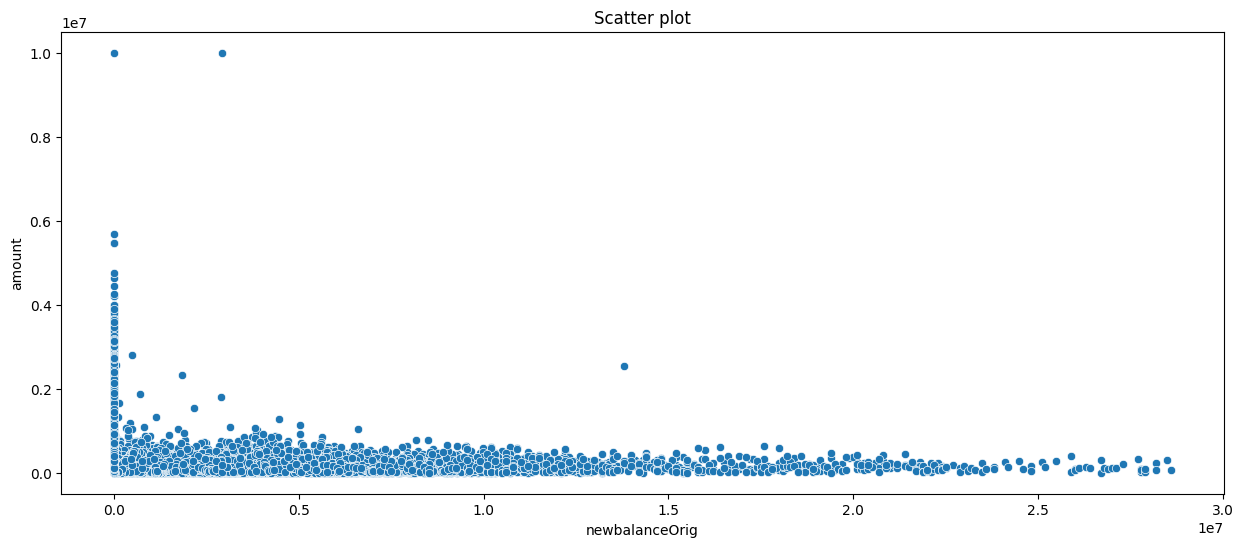

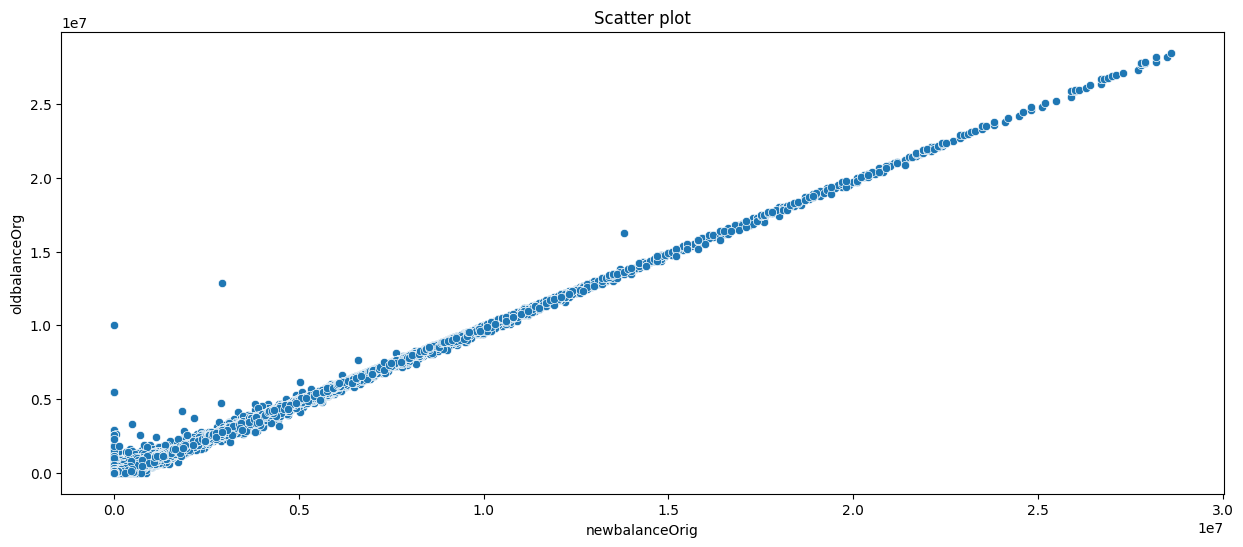

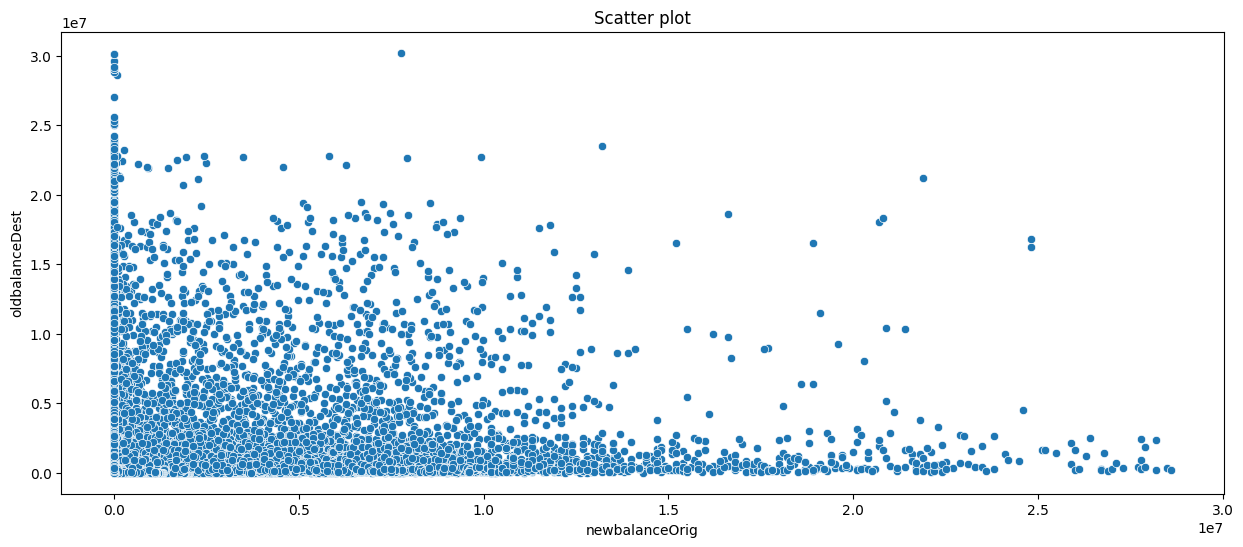

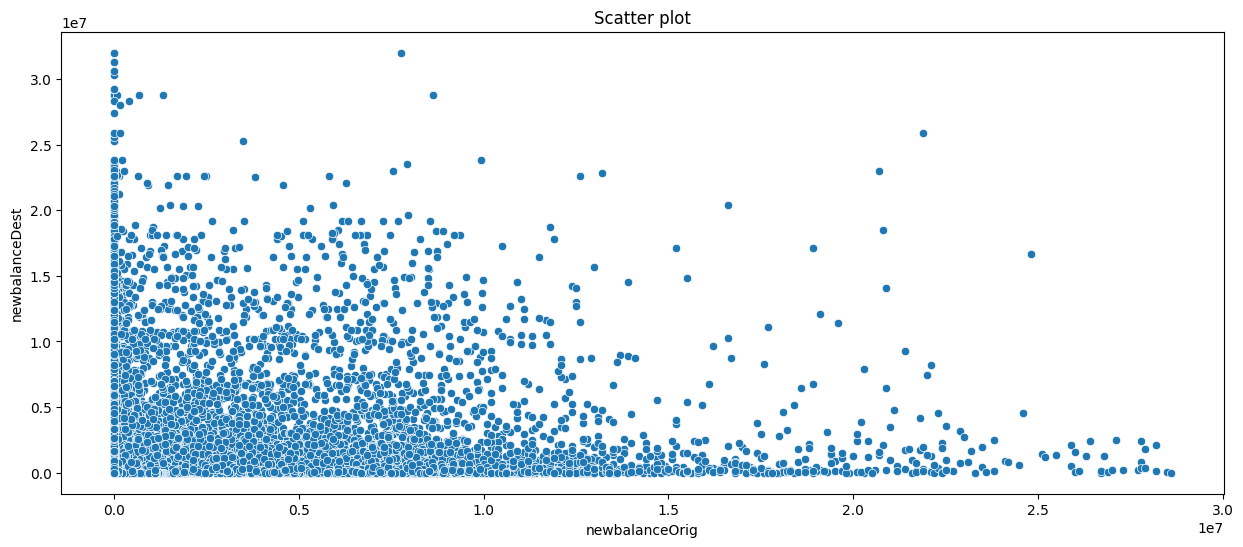

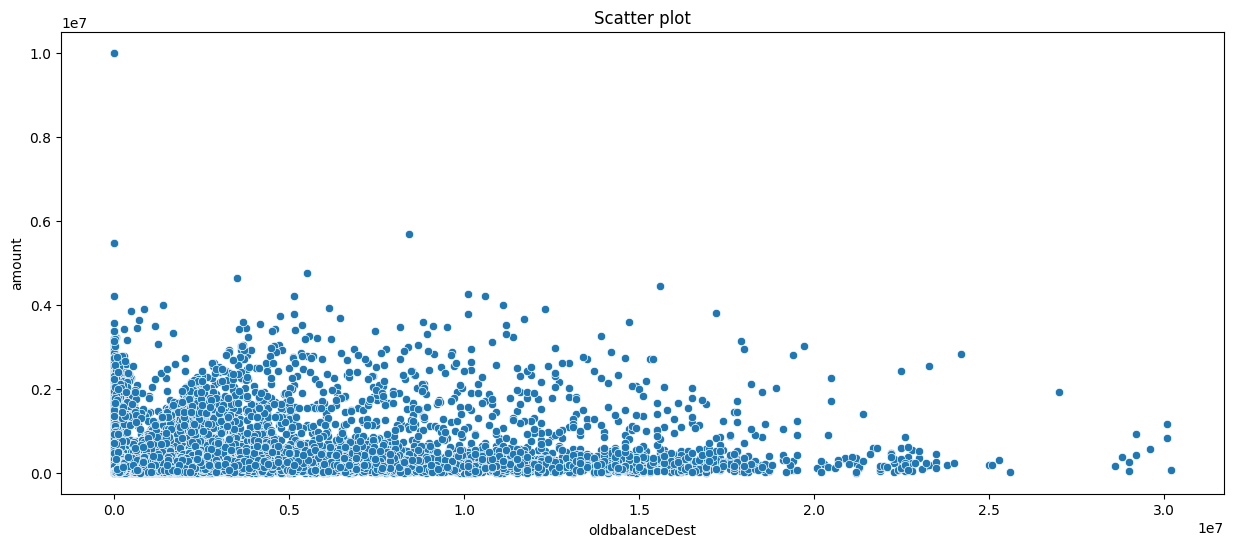

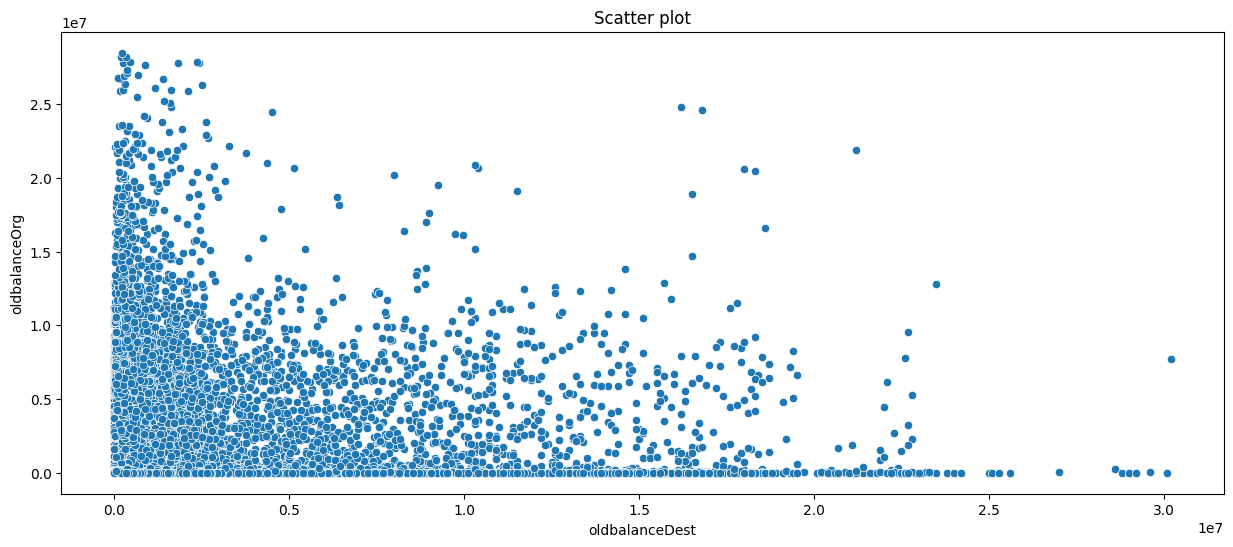

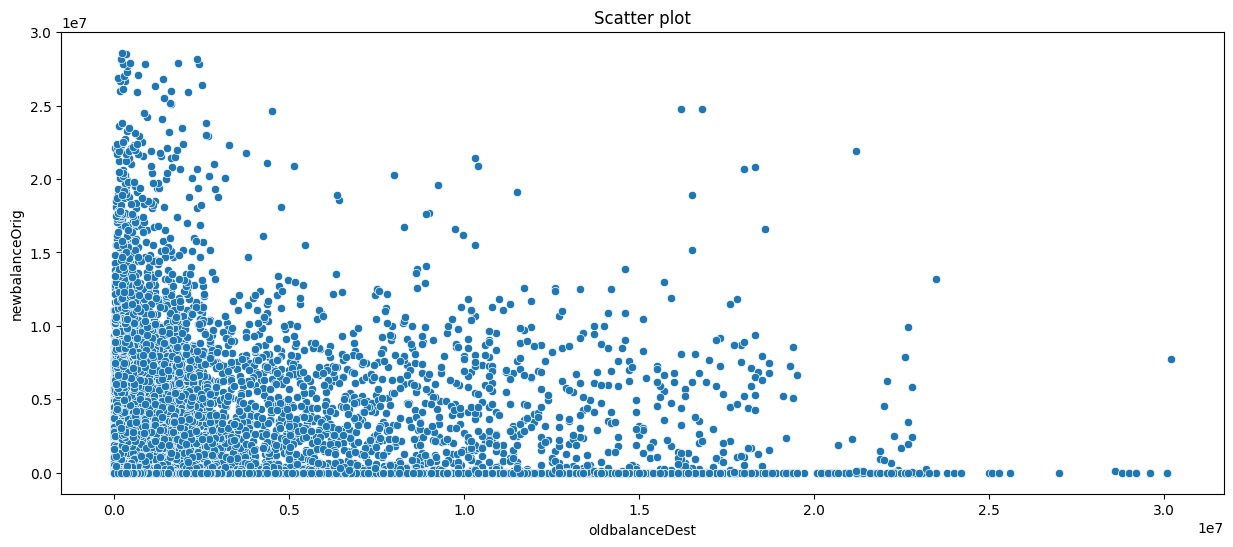

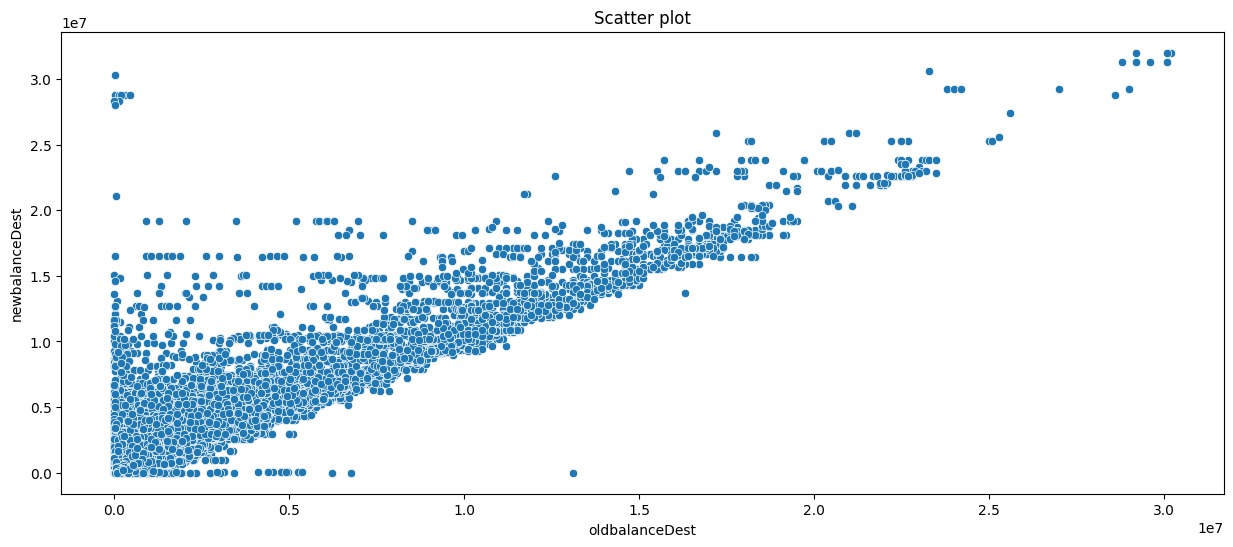

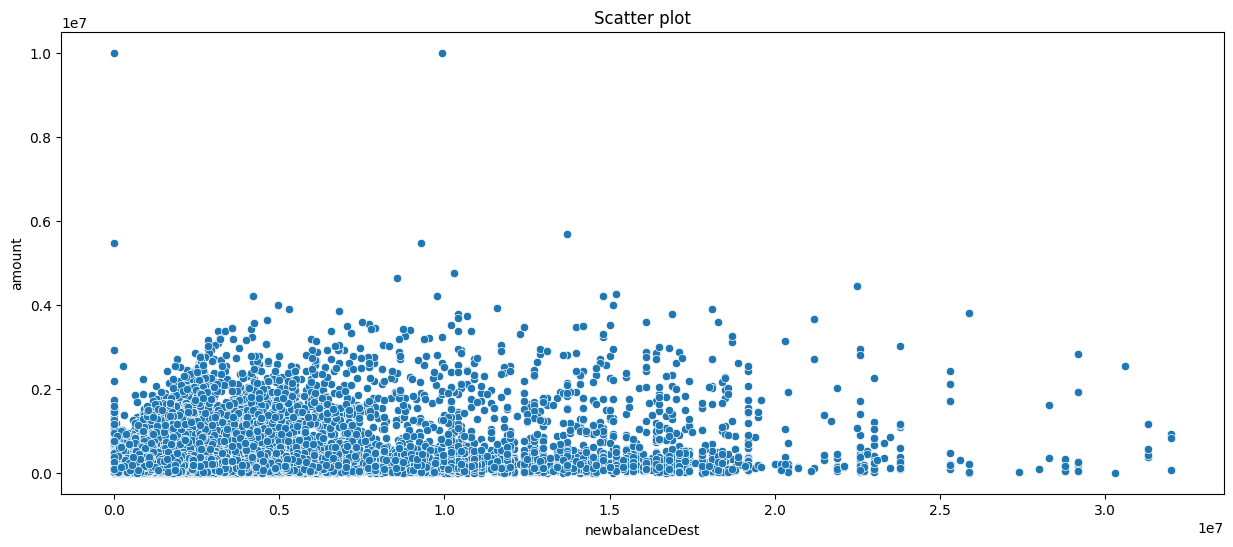

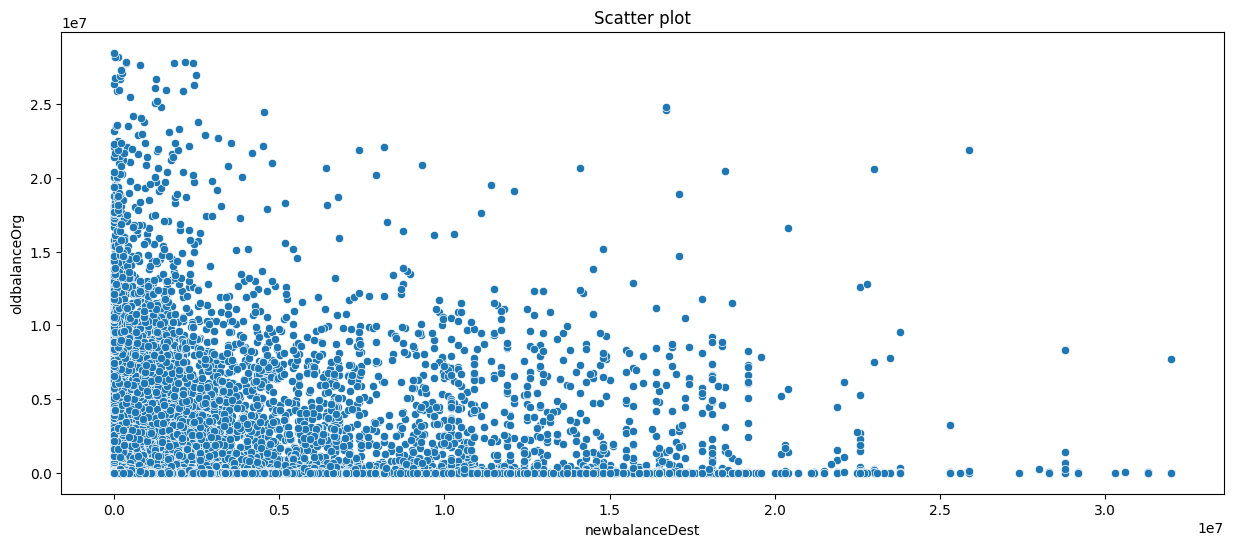

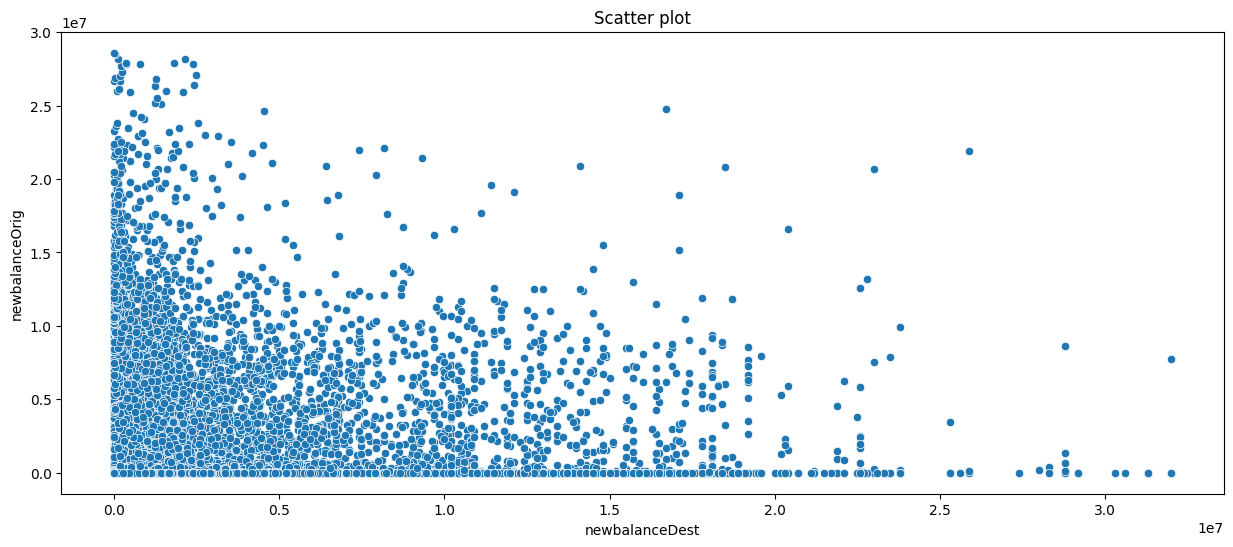

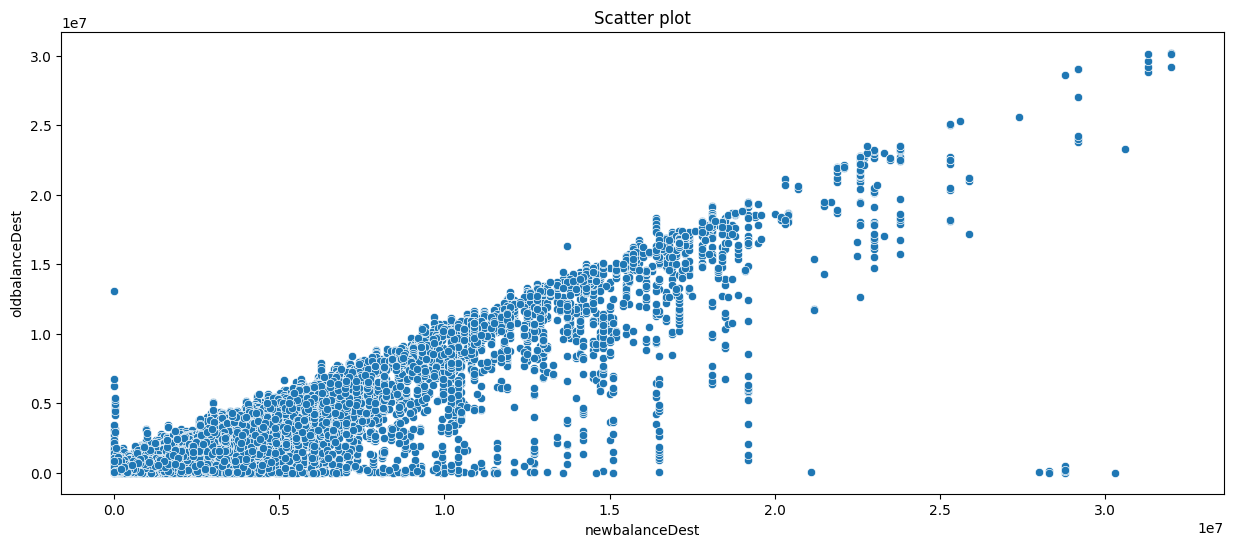

In [34]:
for i in continuous:
    for j in continuous:
      if i != j:
          plt.figure(figsize=(15, 6))
          sns.scatterplot(x=i, y=j, data=df, palette='hls')
          plt.title(f'Scatter plot')
          plt.show()

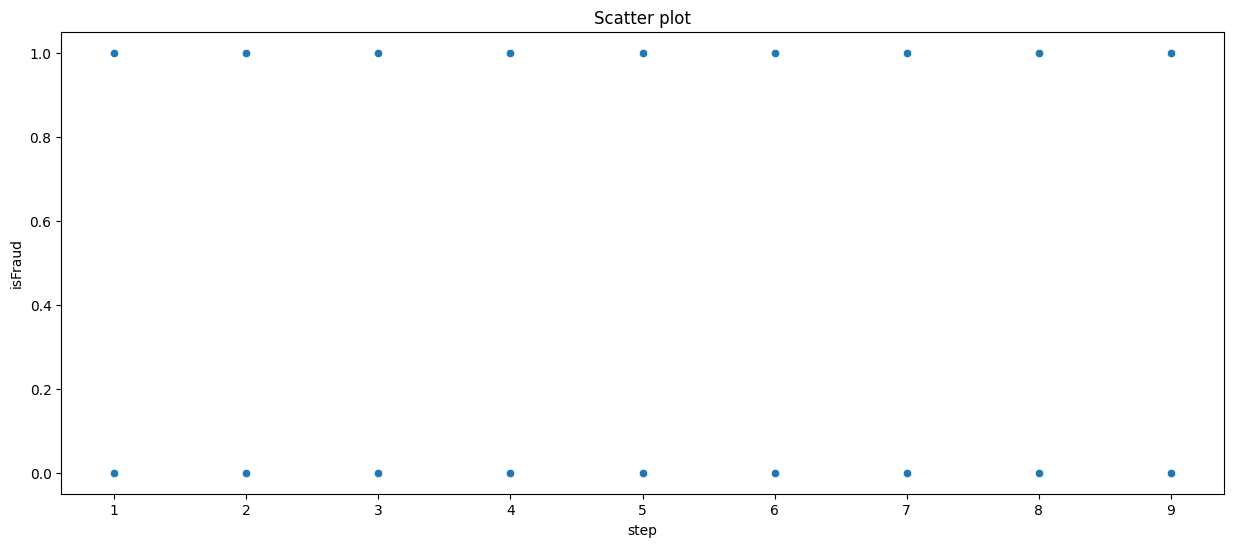

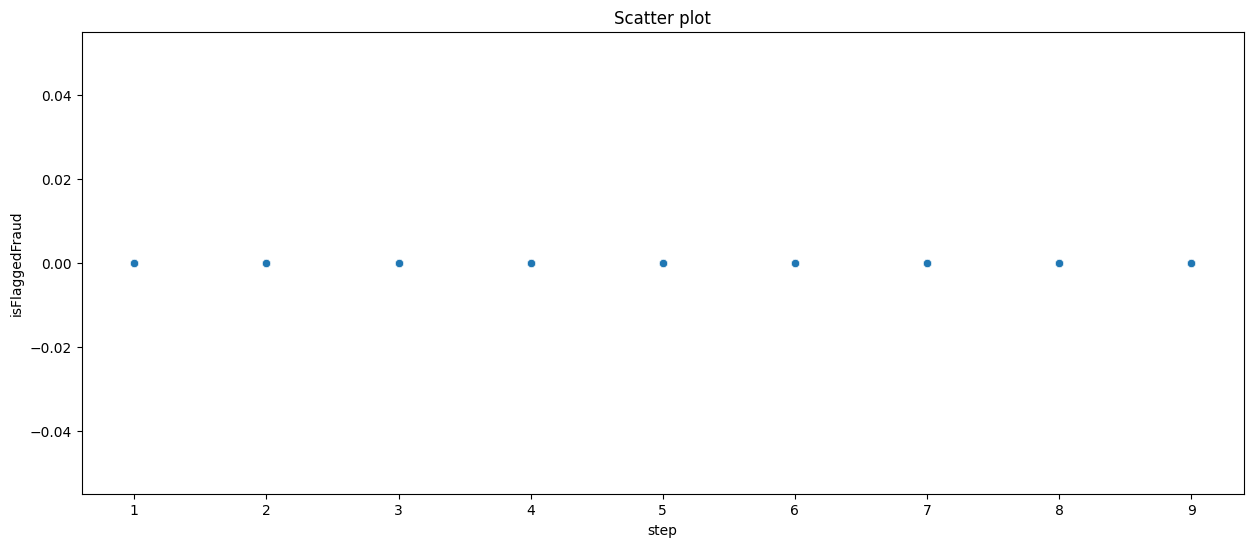

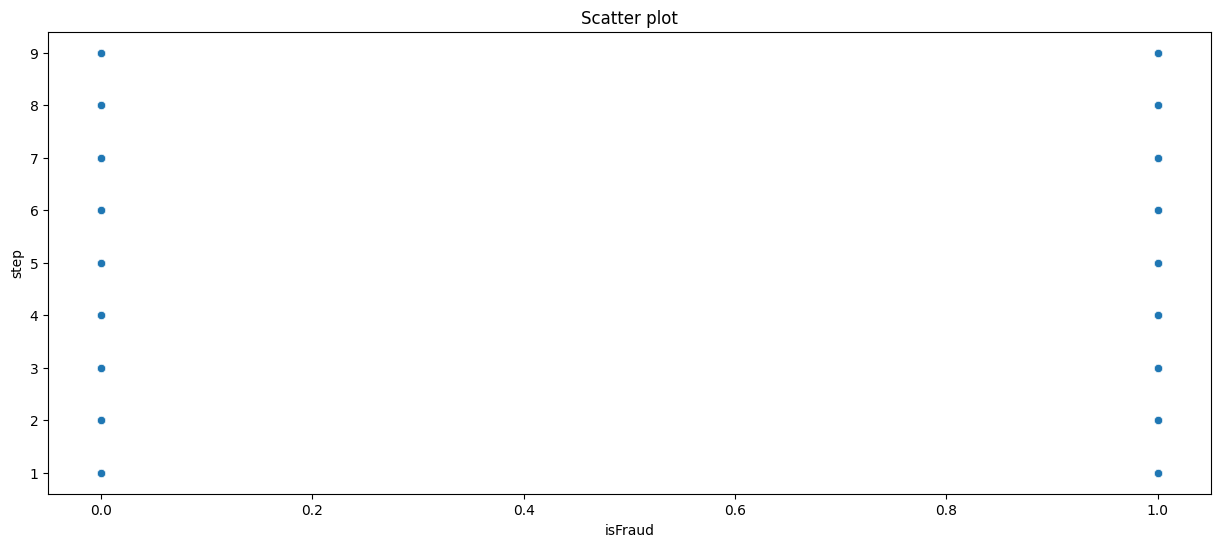

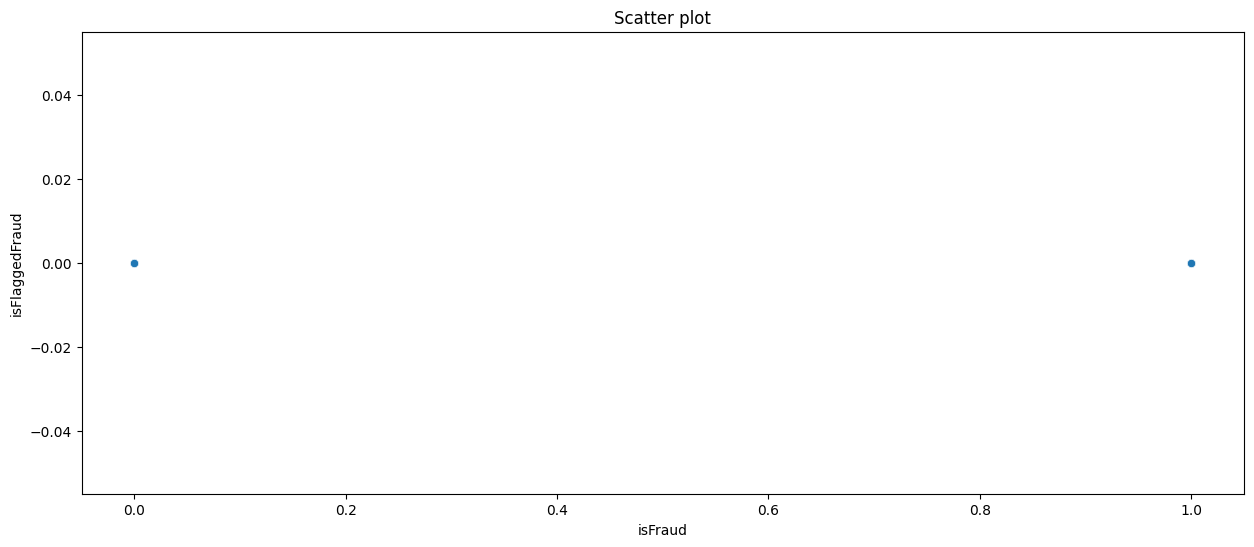

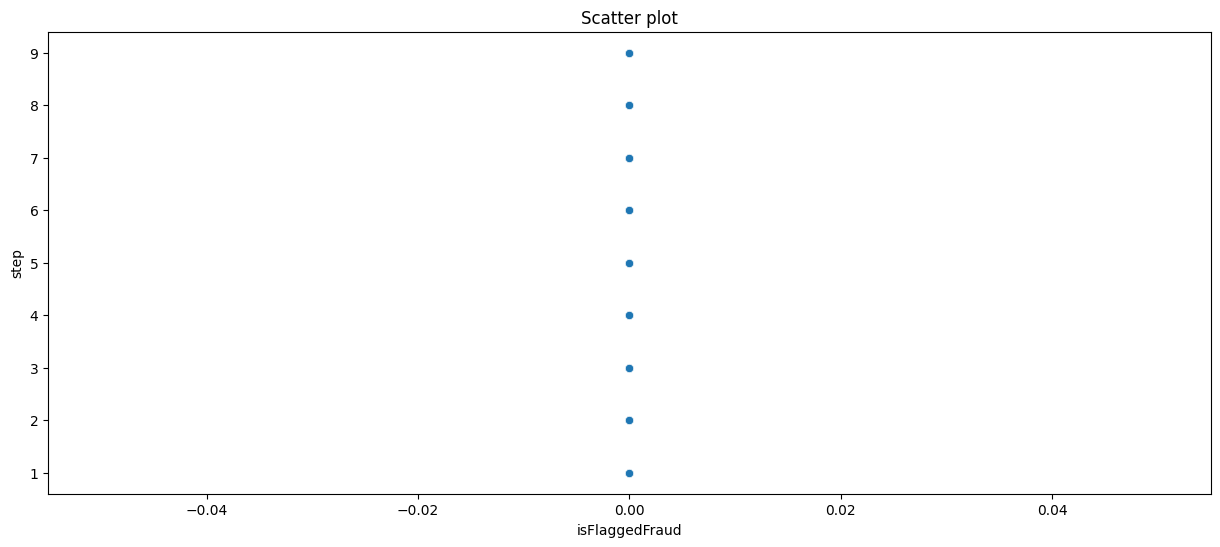

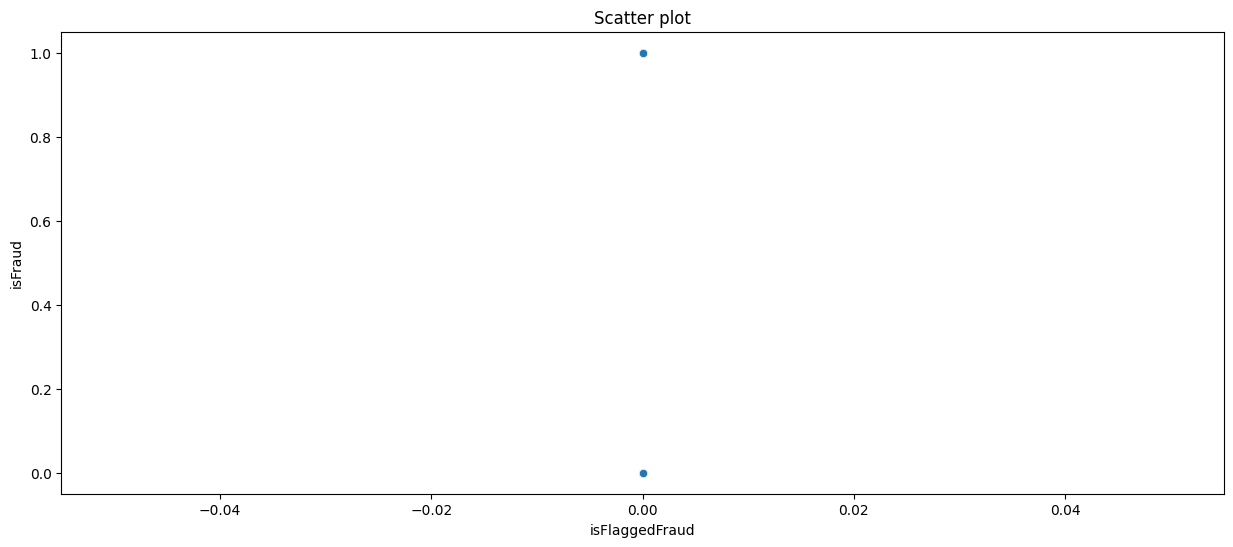

In [35]:
for i in discrete:
    for j in discrete:
      if i != j:
          plt.figure(figsize=(15, 6))
          sns.scatterplot(x=i, y=j, data=df, palette='hls')
          plt.title(f'Scatter plot')
          plt.show()

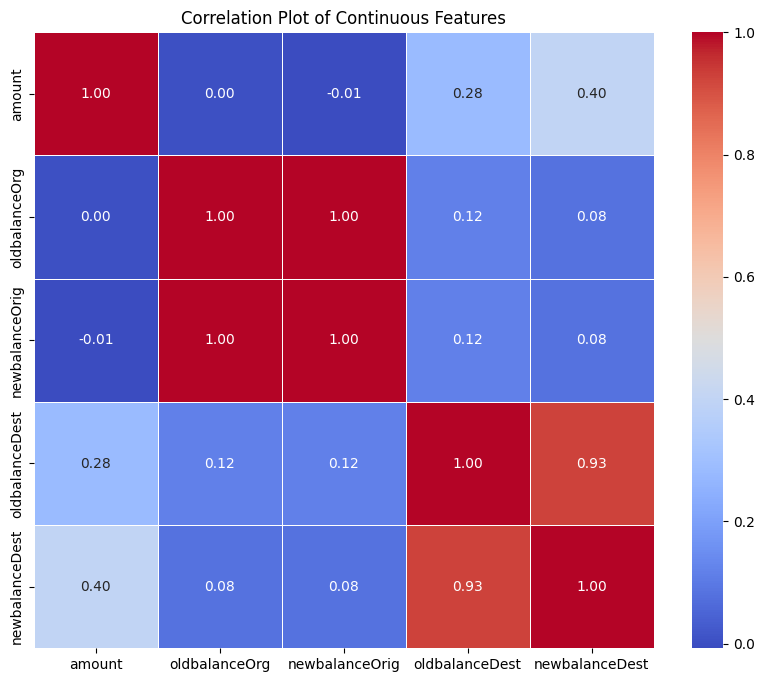

In [36]:
corr_matrix = df[continuous].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot of Continuous Features')
plt.show()

In [37]:
df = df.drop(['oldbalanceOrg', 'oldbalanceDest'], axis=1)

In [38]:
df.shape

(59304, 9)

In [39]:
df = df.drop(['isFlaggedFraud'], axis=1)

In [40]:
df.shape

(59304, 8)

In [41]:
df = df.drop(['nameOrig', 'nameDest'], axis=1)

In [42]:
df.shape

(59304, 6)

In [43]:
df.columns

Index(['step', 'type', 'amount', 'newbalanceOrig', 'newbalanceDest',
       'isFraud'],
      dtype='object')

In [44]:
object_types = ['type']

In [45]:
df_dummies = pd.get_dummies(df[object_types])

In [46]:
df_dummies

type_CASH_IN  type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER
0             False          False       False          True          False
1             False          False       False          True          False
2             False          False       False         False           True
3             False           True       False         False          False
4             False          False       False          True          False
...             ...            ...         ...           ...            ...
59299          True          False       False         False          False
59300          True          False       False         False          False
59301          True          False       False         False          False
59302          True          False       False         False          False
59303          True          False       False         False          False

[59304 rows x 5 columns]

In [47]:
df_final = pd.concat([df.drop(object_types, axis=1), df_dummies], axis=1)

In [48]:
df_final

step     amount  newbalanceOrig  newbalanceDest  isFraud  type_CASH_IN  \
0         1    9839.64       160296.36            0.00      0.0         False   
1         1    1864.28        19384.72            0.00      0.0         False   
2         1     181.00            0.00            0.00      1.0         False   
3         1     181.00            0.00            0.00      1.0         False   
4         1   11668.14        29885.86            0.00      0.0         False   
...     ...        ...             ...             ...      ...           ...   
59299     9  187177.26     22200000.00       553308.88      0.0          True   
59300     9   65860.73     22300000.00      4513619.47      0.0          True   
59301     9   79056.73     22400000.00         5225.24      0.0          True   
59302     9   61395.61     22400000.00      1848375.70      0.0          True   
59303     9  127486.85     22500000.00       197891.83      0.0          True   

       type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER  
0              False       False          True          False  
1              False       False          True          False  
2              False       False         False           True  
3               True       False         False          False  
4              False       False          True          False  
...              ...         ...           ...            ...  
59299          False       False         False          False  
59300          False       False         False          False  
59301          False       False         False          False  
59302          False       False         False          False  
59303          False       False         False          False  

[59304 rows x 10 columns]

In [49]:
df_final['isFraud'].value_counts()

isFraud
0.0    59200
1.0      104
Name: count, dtype: int64

In [50]:
X = df_final.drop('isFraud', axis = 1)
y = df_final['isFraud']

###Splitting into Training and testing

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [74]:
from sklearn.metrics import accuracy_score

log_reg_pred = log_reg_model.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print("Logistic Regression Accuracy:", log_reg_accuracy)
lr_accuracy_percent = log_reg_accuracy*100
print(lr_accuracy_percent)

Logistic Regression Accuracy: 0.9471376781047129
94.7137678104713


In [57]:
y_pred_train = log_reg_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9482747718314609


## SVM

In [58]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train_resampled, y_train_resampled)

SVC()

In [75]:
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)
svm_accuracy_percent = svm_accuracy*100
print(svm_accuracy_percent)

SVM Accuracy: 0.5759210859118118
57.59210859118118


In [60]:
y_pred_train = svm_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.5727926142950488


## Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from xgboost import XGBClassifier

In [62]:
dt_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
dt_model.fit(X_train_resampled, y_train_resampled)
dt_predicted = dt_model.predict(X_test)

In [63]:
dt_accuracy_score = accuracy_score(y_test, dt_predicted)
dt_accuracy_percent = dt_accuracy_score*100

In [64]:
print('Accuracy Score of the Decision Tree model is {}'.format(dt_accuracy_score))
print('Accuracy Percentage of the Decision Tree model is {} %'.format(round(dt_accuracy_percent, 2)))

Accuracy Score of the Decision Tree model is 0.9276620858275019
Accuracy Percentage of the Decision Tree model is 92.77 %


In [67]:
from sklearn.metrics import confusion_matrix, classification_report
print('Classification report for Decision Tree model:\n', classification_report(y_test, dt_predicted))
dt_conf_mat = confusion_matrix(y_true=y_test, y_pred=dt_predicted)
print('Confusion matrix for Decision Tree model:\n', dt_conf_mat)

Classification report for Decision Tree model:
               precision    recall  f1-score   support

         0.0       1.00      0.93      0.96     11837
         1.0       0.02      0.83      0.04        24

    accuracy                           0.93     11861
   macro avg       0.51      0.88      0.50     11861
weighted avg       1.00      0.93      0.96     11861

Confusion matrix for Decision Tree model:
 [[10983   854]
 [    4    20]]


##XG Boost

In [68]:
xgb_model = XGBClassifier(max_depth = 4)
xgb_model.fit(X_train_resampled, y_train_resampled)
xgb_predicted = xgb_model.predict(X_test)

In [69]:
xgb_accuracy_score = accuracy_score(y_test, xgb_predicted)
xgb_accuracy_percent = xgb_accuracy_score*100

In [70]:
print('Accuracy Score of the XGBoost model is {}'.format(xgb_accuracy_score))
print('Accuracy Percentage of the XGBoost model is {} %'.format(round(xgb_accuracy_percent, 2)))

Accuracy Score of the XGBoost model is 0.9856673130427451
Accuracy Percentage of the XGBoost model is 98.57 %


In [71]:
print('Classification report for XGBoost model:\n', classification_report(y_test, xgb_predicted))
xgb_conf_mat = confusion_matrix(y_true=y_test, y_pred=xgb_predicted)
print('Confusion matrix for XGBoost model:\n', xgb_conf_mat)

Classification report for XGBoost model:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     11837
         1.0       0.09      0.67      0.16        24

    accuracy                           0.99     11861
   macro avg       0.54      0.83      0.58     11861
weighted avg       1.00      0.99      0.99     11861

Confusion matrix for XGBoost model:
 [[11675   162]
 [    8    16]]


In [76]:
from tabulate import tabulate

# assign data
mydata = [
    ["Accuracy Score ", round(lr_accuracy_percent, 2),round(svm_accuracy_percent, 2),round(dt_accuracy_percent, 2),round(xgb_accuracy_percent, 2)],
]

# create header
head = ["", "Logistic Regression", "SVM", "Decision Tree Classifier", "XGBoost"]

# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

+----------------+-----------------------+-------+----------------------------+-----------+
|                |   Logistic Regression |   SVM |   Decision Tree Classifier |   XGBoost |
+================+=======================+=======+============================+===========+
| Accuracy Score |                 94.71 | 57.59 |                      92.77 |     98.57 |
+----------------+-----------------------+-------+----------------------------+-----------+
